# Dataset: Google Job Skills

## Minha missão será entender melhor o perfil das vagas oferecidas pelo Google.

**Perguntas balisadoras:**

1. Quais são os países com mais vagas anunciadas pela Google? 

2. Qual o número de vagas oferecidas para o Brasil? 

3. Quais são as qualificações mínimas e desejáveis que o Google mais exige? 

4. Quais skills de programação são mais pedidas nas vagas do Google? 

5. Se eu tivesse um amigo que sonha em se candidatar a uma vaga no Google, que habilidades e skills você falaria para ele desenvolver? E que dicas você daria para ele? 

6. Se você quisesse montar um sistema de recomendação para a Google achar candidatos, que outras informações além dessas você adicionaria no dataset para melhorar o match com os candidatos?  

### Seções:

- [Bibliotecas utilizadas](#Bibliotecas-utilizadas:)

- [Leitura e Análises Preliminares](#Primeira-parte:-Leitura-e-Análises-Preliminares)

- [EDA: Análise Exploratória](#EDA:-Exploratory-Data-Analysis)
    - [Que Países Anunciam mais Vagas?](#Que-países-anunciam-mais-vagas?)
    - [Vagas Anunciadas para o Brasil](#Vagas-anunciadas-para-o-Brasil:)
    - [Categorias Mais Frequentes das Vagas Globais](#Categorias-mais-frequentes-das-vagas-globais:)
    - [Qualificação Mínima](#Qualificação-mínima:)
    - [Anos de Experiência](#ANOS-DE-EXPERIÊNCIA:)
    - [Linguagens de Programação mais Buscadas](#Linguagens-de-programação)
- [Estudo: Hard Skills e Soft Skills para Sistema de Recomendação](#Estudo:-Hard-Skills-e-Soft-Skills-para-Sistema-de-Recomendação)
- [Rudimentos de um Sistema de Recomendação](#Rudimentos-de-um-Sistema-de-Recomendação)
- [Dicas para um amigo que quer trabalhar no Google.](#Dicas-para-um-amigo-que-quer-trabalhar-no-Google.)
- [Outras visualização interessantes](#Outras-visualização-interessantes)

# Bibliotecas utilizadas:

In [1]:
# Para as análises:
import pandas as pd
import numpy as np

#___________________________
# Para uso de Regex em extração de padrões textuais:
import re

#___________________________
# Impacto visual com WordCloud:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#___________________________
# Para uso em Bag_Of_Words (análise ocorrência de palavras):
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import stop_words

#___________________________
# Para cálculo de distância em esboço de Sistema de Recomendação:
from scipy.spatial.distance import pdist, squareform

#________________________
# Bibliotecas de visualização
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as mlp
mlp.use('default')

%matplotlib inline

---------------------------------------------


# Primeira parte: Leitura e Análises Preliminares

## Leitura do arquivo: 

In [2]:
df = pd.read_excel('job_skills.xlsx')

## Informações gerais:

In [3]:
df.head()

Company                                              Title  \
0  Google                       Google Cloud Program Manager   
1  Google  Supplier Development Engineer (SDE), Cable/Con...   
2  Google  Data Analyst, Product and Tools Operations, Go...   
3  Google            Developer Advocate, Partner Engineering   
4  Google     Program Manager, Audio Visual (AV) Deployments   

                       Category                          Location  \
0            Program Management                         Singapore   
1  Manufacturing & Supply Chain                   Shanghai, China   
2           Technical Solutions       New York, NY, United States   
3           Developer Relations  Mountain View, CA, United States   
4            Program Management      Sunnyvale, CA, United States   

                                    Responsibilities  \
0  Shape, shepherd, ship, and show technical prog...   
1  Drive cross-functional activities in the suppl...   
2  Collect and analyze data to draw insight and i...   
3  Work one-on-one with the top Android, iOS, and...   
4  Plan requirements with internal customers.\nPr...   

                              Minimum Qualifications  \
0  BA/BS degree or equivalent practical experienc...   
1  BS degree in an Engineering discipline or equi...   
2  Bachelor’s degree in Business, Economics, Stat...   
3  BA/BS degree in Computer Science or equivalent...   
4  BA/BS degree or equivalent practical experienc...   

                            Preferred Qualifications  
0  Experience in the business technology market a...  
1  BSEE, BSME or BSIE degree.\nExperience of usin...  
2  Experience partnering or consulting cross-func...  
3  Experience as a software developer, architect,...  
4  CTS Certification.\nExperience in the construc...

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 7 columns):
Company                     1250 non-null object
Title                       1250 non-null object
Category                    1250 non-null object
Location                    1250 non-null object
Responsibilities            1235 non-null object
Minimum Qualifications      1236 non-null object
Preferred Qualifications    1236 non-null object
dtypes: object(7)
memory usage: 68.4+ KB


## Verificando as informações faltantes:

In [5]:
df[df.isnull().any(axis=1)]

Company                                              Title  \
15   Google                        Manufacturing Test Engineer   
72   Google  Software Engineer, Android Applications, Veril...   
91   Google  Analog / Mixed Signal IC Design Engineer, Veri...   
97   Google  Program Manager, Behavioral Health, Verily Lif...   
98   Google  Software Engineer, Android Applications, Veril...   
123  Google  Manufacturing Engineer, Verily Life Sciences -...   
150  Google  IC Test Engineer, Verily Life Sciences - South...   
160  Google  Software Engineer, Verily Life Sciences - Sout...   
202  Google  Firmware Engineer, Verily Life Sciences - Sout...   
206  Google  Software Test Engineer, Mobile and Web Applica...   
210  Google  iOS Application Developer, Project Baseline, V...   
230  Google  Technical Solutions Consultant, Verily Life Sc...   
241  Google  Technical Program Manager, Test Engineering, V...   
286  Google  Software Test Engineer, Devices, Verily Life S...   
307  Google  Strategic Partner Development Manager, Retail ...   

                 Category                                Location  \
15   Hardware Engineering  South San Francisco, CA, United States   
72   Software Engineering            Cambridge, MA, United States   
91   Hardware Engineering  South San Francisco, CA, United States   
97     Program Management  South San Francisco, CA, United States   
98   Software Engineering  South San Francisco, CA, United States   
123  Hardware Engineering  South San Francisco, CA, United States   
150  Hardware Engineering  South San Francisco, CA, United States   
160  Software Engineering  South San Francisco, CA, United States   
202  Software Engineering  South San Francisco, CA, United States   
206  Software Engineering        Mountain View, CA, United States   
210  Software Engineering        Mountain View, CA, United States   
230   Technical Solutions        Mountain View, CA, United States   
241    Program Management  South San Francisco, CA, United States   
286  Software Engineering  South San Francisco, CA, United States   
307          Partnerships                        München, Germany   

    Responsibilities                             Minimum Qualifications  \
15               NaN                                                NaN   
72               NaN                                                NaN   
91               NaN                                                NaN   
97               NaN                                                NaN   
98               NaN                                                NaN   
123              NaN                                                NaN   
150              NaN                                                NaN   
160              NaN                                                NaN   
202              NaN                                                NaN   
206              NaN                                                NaN   
210              NaN                                                NaN   
230              NaN                                                NaN   
241              NaN                                                NaN   
286              NaN                                                NaN   
307              NaN  BA/BS degree or equivalent practical experienc...   

                              Preferred Qualifications  
15                                                 NaN  
72                                                 NaN  
91                                                 NaN  
97                                                 NaN  
98                                                 NaN  
123                                                NaN  
150                                                NaN  
160                                                NaN  
202                                                NaN  
206                                                NaN  
210           

In [6]:
df[df.isnull().any(axis=1)].shape[0] #Apenas 15 linhas apresentam informações faltantes. Ainda assim, não vejo necessidade em retirar nenhuma ainda.

15

Este conjunto de vagas com informação faltante não apresenta informações quanto a uma ou mais destas colunas: 'Responsibilities' (responsabilidades), 'Minimum Qualifications' (qualificação mínima) e 'Preferred Qualifications' (qualificação desejada).

-------------------------------------

# EDA: Exploratory Data Analysis

## Qual a composição da coluna 'Company'?

In [7]:
# Apenas para verificar a porcentagem de vagas anunciadas por cada companhia: 
df['Company'].value_counts()/df['Company'].shape[0]

Google     0.9816
YouTube    0.0184
Name: Company, dtype: float64

#### Em uma primeira análise, sabendo que o Youtube compõe o grupo Google, não criaremos distinções entre as duas.

In [8]:
# Apenas para ter um vislumbre dos dados de exclusividade do YouTube
df[df['Company']=='YouTube']

Company                                              Title  \
159   YouTube                Product Strategist, Growth, YouTube   
309   YouTube       Performance Video Agency Specialist, YouTube   
326   YouTube  Quality Program Manager, Global Vendor Operati...   
421   YouTube             Online Partner Manager (MENA), YouTube   
466   YouTube                Product Strategist, Growth, YouTube   
514   YouTube     Enforcement Analyst, Trust and Safety, YouTube   
601   YouTube                 Product Marketing Manager, YouTube   
643   YouTube        Consumer Product Marketing Manager, YouTube   
655   YouTube  Global Head of Music Social and Influencer Mar...   
677   YouTube  Global Head of Music Social and Influencer Mar...   
856   YouTube                      Interaction Designer, YouTube   
897   YouTube                      Scaled Abuse Analyst, YouTube   
912   YouTube                Product Strategist, Growth, YouTube   
919   YouTube                       Principal, Strategy, YouTube   
947   YouTube                              Risk Advisor, YouTube   
1011  YouTube                Residual Manager, YouTube Originals   
1033  YouTube                Residual Manager, YouTube Originals   
1061  YouTube  Associate Legal Counsel, Development, Producti...   
1069  YouTube  Legal and Policy Operations Specialist (Englis...   
1087  YouTube  Legal Counsel, Development, Production and Lic...   
1168  YouTube                Product Strategist, Growth, YouTube   
1214  YouTube  Executive/Administrative Business Partner, You...   
1226  YouTube  Real Estate and Workplace Services (REWS) Busi...   

                              Category                        Location  \
159                  Business Strategy    San Bruno, CA, United States   
309         Sales & Account Management     New York, NY, United States   
326         Product & Customer Support                Hyderabad, India   
421                       Partnerships          London, United Kingdom   
466                  Business Strategy    San Bruno, CA, United States   
514         Product & Customer Support                       Singapore   
601         Marketing & Communications               Stockholm, Sweden   
643         Marketing & Communications             Mexico City, Mexico   
655         Marketing & Communications     New York, NY, United States   
677         Marketing & Communications    San Bruno, CA, United States   
856           User Experience & Design    San Bruno, CA, United States   
897                  Business Strategy    San Bruno, CA, United States   
912                  Business Strategy    San Bruno, CA, United States   
919                  Business Strategy    San Bruno, CA, United States   
947                            Finance    San Bruno, CA, United States   
1011                           Finance  Los Angeles, CA, United States   
1033                           Finance    San Bruno, CA, United States   
1061      Legal & Government Relations  Los Angeles, CA, United States   
1069      Legal & Government Relations                       Singapore   
1087      Legal & Government Relations  Los Angeles, CA, United States   
1168                 Business Strategy    San Bruno, CA, United States   
1214                    Administrative  Los Angeles, CA, United States   
1226  Real Estate & Workplace Services    San Bruno, CA, United States   

                                       Responsibilities  \
159   Help define the performance metrics and goals ...   
309   Manage Performance relationships from C-level ...   
326   Build a global quality assurance program, driv...   
421   Manage and help grow a portfolio of YouTube cr...   
466   Help define the performance metrics and goals ...   
514   Develop and implement strategies to enforce Yo...   
601   Work across several aspects of marketing – fro...   
643   Seek actionable consumer insights to inform pr...   
655   Be responsible for building the social media a...   
677   

#  Que países anunciam mais vagas?


### Criação e ajuste da coluna 'Countries' com base na coluna 'Location'.

In [9]:
df['Location'].unique()

array(['Singapore', 'Shanghai, China', 'New York, NY, United States',
       'Mountain View, CA, United States', 'Sunnyvale, CA, United States',
       'Dublin, Ireland', 'Xinyi District, Taiwan',
       'Seattle, WA, United States', 'Amsterdam, Netherlands',
       'South San Francisco, CA, United States', 'Frankfurt, Germany',
       'Zürich, Switzerland', 'London, United Kingdom',
       'München, Germany', 'Berlin, Germany', 'Hamburg, Germany',
       'San Francisco, CA, United States', 'Milan, Italy',
       'Warszawa, Poland', 'Irvine, CA, United States', 'Paris, France',
       'Kirkland, WA, United States', 'Cambridge, MA, United States',
       'Sydney, Australia', 'Waterloo, ON, Canada', 'Gurugram, India',
       'Dubai - United Arab Emirates', 'Pittsburgh, PA, United States',
       'Chicago, IL, United States', 'Bucharest, Romania',
       'Stockholm, Sweden', 'Tokyo, Japan', 'Hyderabad, India',
       'Seoul, South Korea', 'Perth, Australia', 'Taipei, Taiwan',
       'San 

Para começar, vale notar o padrão da coluna 'Location', que registra os países como última informação após uma vírgula. 

Criarei uma coluna exclusiva para países chamada: 'Countries'. 

Para isso acessarei as strings da coluna 'Location', dividirei cada um delas nos lugares em que ocorre vírgula e manterei apenas a parte final. 

In [10]:
df['Countries'] = df['Location'].apply(lambda x: x.split(',')[-1]) 

In [11]:
df['Countries'].unique()

array(['Singapore', ' China', ' United States', ' Ireland', ' Taiwan',
       ' Netherlands', ' Germany', ' Switzerland', ' United Kingdom',
       ' Italy', ' Poland', ' France', ' Australia', ' Canada', ' India',
       'Dubai - United Arab Emirates', ' Romania', ' Sweden', ' Japan',
       ' South Korea', ' Brazil', ' Turkey', ' Philippines', ' Israel',
       'Hong Kong', ' Norway', ' Mexico', ' Finland', ' South Africa',
       ' Denmark', ' Belgium', ' Colombia', ' Austria', ' Indonesia',
       ' Russia', ' Czechia', ' Croatia', ' Greece', ' Hungary', ' Spain',
       ' Thailand', ' Slovakia', ' Lithuania', ' Kenya', ' Argentina',
       ' Ukraine', ' Portugal', 'Nigeria', ' USA'], dtype=object)

'Dubai - United Arab Emirates' fugiu ao padrão da vírgula, o que busco corrigir na linha seguinte:

In [12]:
df['Countries'] = df['Countries'].apply(lambda x: x.split('-')[-1].strip())

In [13]:
df['Countries'].unique()

array(['Singapore', 'China', 'United States', 'Ireland', 'Taiwan',
       'Netherlands', 'Germany', 'Switzerland', 'United Kingdom', 'Italy',
       'Poland', 'France', 'Australia', 'Canada', 'India',
       'United Arab Emirates', 'Romania', 'Sweden', 'Japan',
       'South Korea', 'Brazil', 'Turkey', 'Philippines', 'Israel',
       'Hong Kong', 'Norway', 'Mexico', 'Finland', 'South Africa',
       'Denmark', 'Belgium', 'Colombia', 'Austria', 'Indonesia', 'Russia',
       'Czechia', 'Croatia', 'Greece', 'Hungary', 'Spain', 'Thailand',
       'Slovakia', 'Lithuania', 'Kenya', 'Argentina', 'Ukraine',
       'Portugal', 'Nigeria', 'USA'], dtype=object)

O último ajuste necessário é eliminar formas diferentes de se referir ao mesmo objeto (o que causaria problemas de contagem no futuro). O único caso que merece nossa atenção neste sentido é 'USA' e 'United States'.

In [14]:
df['Countries'] = df['Countries'].apply(lambda x: 'USA' if 'United States' in x else x)

In [15]:
df['Countries'].unique()

array(['Singapore', 'China', 'USA', 'Ireland', 'Taiwan', 'Netherlands',
       'Germany', 'Switzerland', 'United Kingdom', 'Italy', 'Poland',
       'France', 'Australia', 'Canada', 'India', 'United Arab Emirates',
       'Romania', 'Sweden', 'Japan', 'South Korea', 'Brazil', 'Turkey',
       'Philippines', 'Israel', 'Hong Kong', 'Norway', 'Mexico',
       'Finland', 'South Africa', 'Denmark', 'Belgium', 'Colombia',
       'Austria', 'Indonesia', 'Russia', 'Czechia', 'Croatia', 'Greece',
       'Hungary', 'Spain', 'Thailand', 'Slovakia', 'Lithuania', 'Kenya',
       'Argentina', 'Ukraine', 'Portugal', 'Nigeria'], dtype=object)

## 2 - Vagas Anunciadas por País

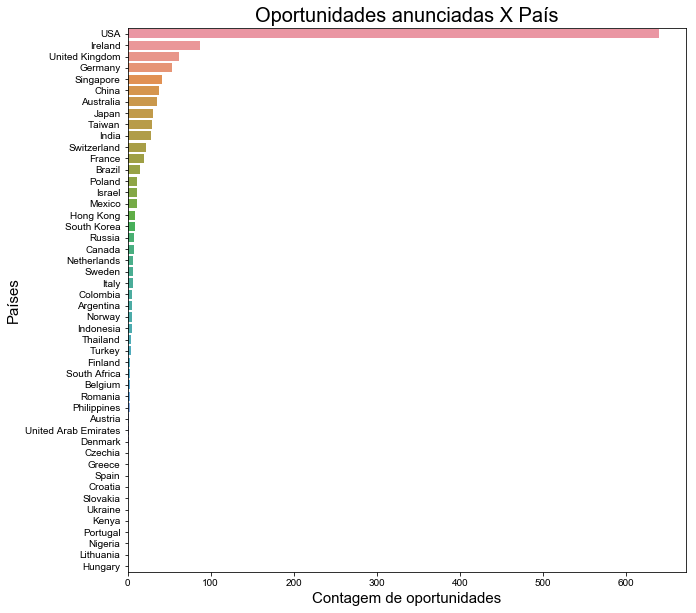

In [16]:
plt.figure(figsize=(10,10))
plt.title('Oportunidades anunciadas X País', fontsize=20)
sns.countplot(y='Countries', data=df, order = df['Countries'].value_counts().index)
plt.xlabel('Contagem de oportunidades', fontsize=15)
plt.ylabel('Países', fontsize=15)
sns.set_style("whitegrid");

Talvez seja interessante registrar os dados agregados de oportunidades por país em forma de tabela:

In [17]:
# Pretendo agrupar os dados por país e utilizar qualquer coluna apenas para criar a contagem das vagas existentes.
# No caso, selecionarei a coluna 'Company' para fazer a contagem. Posteriormente esta coluna (que conterá a contagem de vagas)
# será renomeada para 'Oportunidades', deixando a interpretação mais intuitiva.

oportunidade_pais = df.groupby(['Countries']).agg({'Company': 'count'}).sort_values(by='Company', ascending=False).reset_index()
oportunidade_pais.columns = ['Countries', 'Oportunidades']
oportunidade_pais = oportunidade_pais.set_index('Countries')

# Vamos aproveitar e ver o número de vagas dos 10 países que mais oferecem vagas
oportunidade_pais.head(13)

Oportunidades
Countries                    
USA                       640
Ireland                    87
United Kingdom             62
Germany                    54
Singapore                  41
China                      38
Australia                  35
Japan                      31
Taiwan                     30
India                      28
Switzerland                22
France                     20
Brazil                     15

In [18]:
# Alguns dados sobre a distribuição de vagas por país:
oportunidade_pais.describe()

Oportunidades
count      48.000000
mean       26.041667
std        92.307063
min         1.000000
25%         2.000000
50%         5.000000
75%        16.250000
max       640.000000

In [19]:
# São 48 países em nossa lista.
# A média de oportunidades é de 26 vagas, mas a mediana é de 5 vagas apenas.

### Vamos eliminar os EUA ('USA') da visualização para entrarmos na escala dos demais países: 


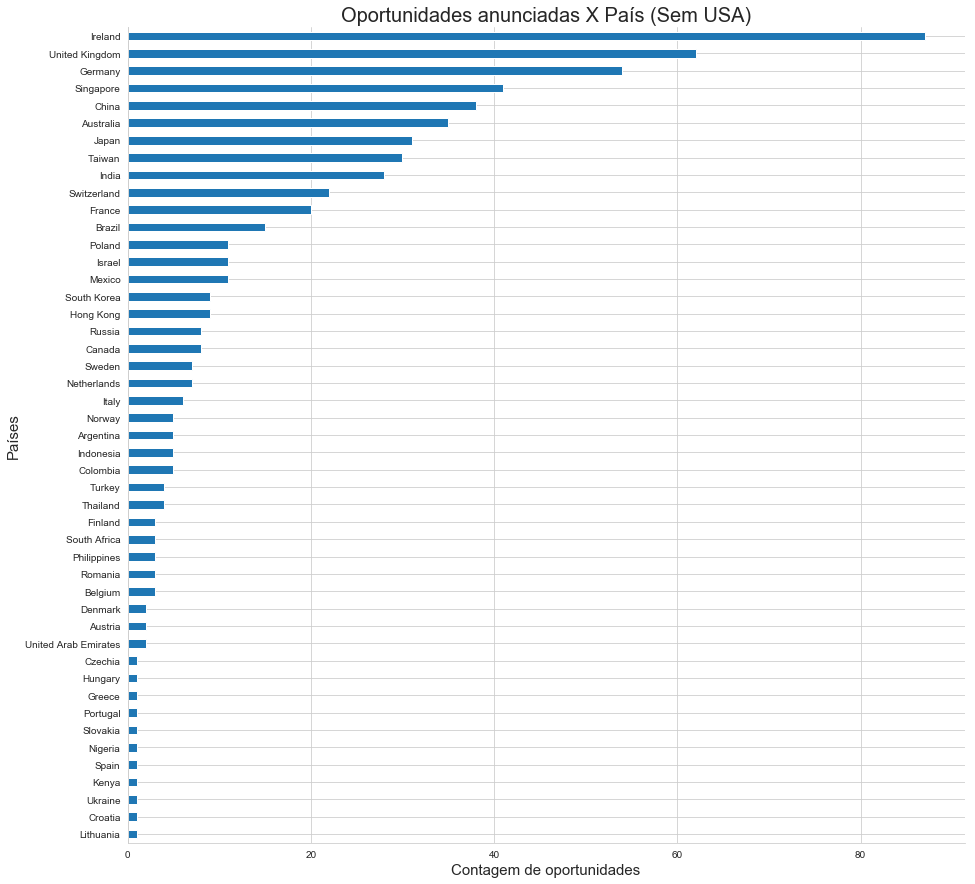

In [20]:
oportunidade_pais.iloc[1:].sort_values(by='Oportunidades', ascending=True).plot(kind='barh', figsize=(15,15), legend=None)
plt.title('Oportunidades anunciadas X País (Sem USA)', fontsize=20)
plt.xlabel('Contagem de oportunidades', fontsize=15)
plt.ylabel('Países', fontsize=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);

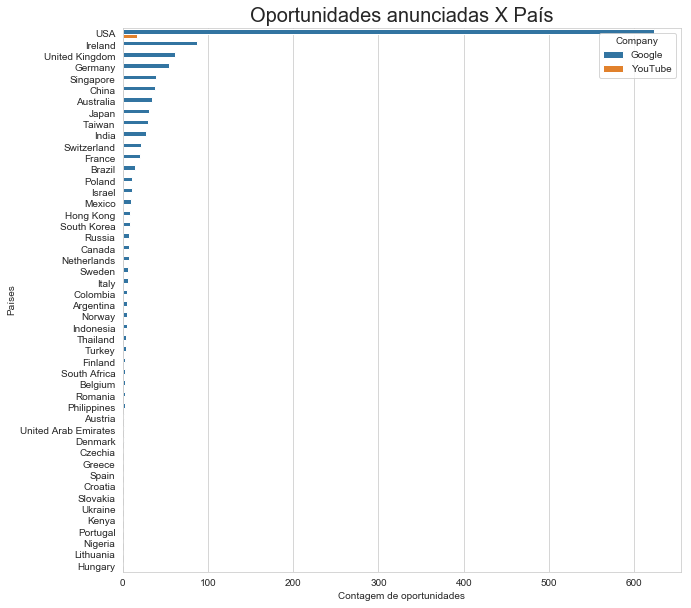

In [21]:
# Apenas para criar a distinção entre vagas para o Youtube e vagas para o Google.
plt.figure(figsize=(10,10))
plt.title('Oportunidades anunciadas X País', fontsize=20)
sns.countplot(y='Countries', data=df, order = df['Countries'].value_counts().index, hue='Company')
plt.xlabel('Contagem de oportunidades')
plt.ylabel('Países');

In [22]:
# Em análises futuras poderíamos agregar estes dados em falantes de lingua inglesa e não inglesa, 
#  ou poderíamos agrupar por continentes, por exemplo.

-------------------------------------------------------------

# Vagas anunciadas para o Brasil:

In [23]:
vagas_brasil = df[df['Countries']=='Brazil']['Countries'].value_counts()[0]

print('Temos {} vagas anunciadas no Brasil'.format(vagas_brasil))

Temos 15 vagas anunciadas no Brasil


#### Em que categorias e títulos tais vagas estaríam distribuídas?

In [24]:
# 1) Restringirei nossos dados aos referentes ao Brasil: df[df['Countries']=='Brazil'
# 2) Farei uma tabela pivotante em que constem como colunas 'Category' e 'Title'.
# 3) Usarei qualquer outra coluna, no caso Company, apenas para fazer uma contagem de elementos.
# 4) Vou ajustá-la de forma a poder renomear as colunas na célula seguinte, deixando a interpretação mais intuitiva.

oportunidades_brasil = pd.pivot_table(data=df[df['Countries']=='Brazil'], 
               index=['Category','Title'], 
               columns=['Countries'], 
               aggfunc={'Company':'count'}).reset_index()

In [25]:
oportunidades_brasil.columns = ['Categoria', 'Título', 'Número de Oportunidades']
oportunidades_brasil

Categoria  \
0            Business Strategy   
1            Business Strategy   
2                      Finance   
3                      Finance   
4                 Partnerships   
5            People Operations   
6   Sales & Account Management   
7   Sales & Account Management   
8   Sales & Account Management   
9         Software Engineering   
10         Technical Solutions   

                                               Título  Número de Oportunidades  
0   Agency Go-to-Market and Business Analytics Man...                        1  
1                        Head of Go-To-Market, Brazil                        1  
2                        Business Intern 2018, Brazil                        4  
3   Payroll Operations Controller, Financial Opera...                        1  
4   Strategic Partner Manager, Product Partnership...                        1  
5                        Staffing Programs Specialist                        1  
6   Account Executive, Mid Market Sales, Google Ma...                        1  
7            Account Strategist (English, Portuguese)                        1  
8   Account Strategist, Google Marketing Solutions...                        1  
9                         Software Engineer (English)                        2  
10  Customer Engineer, Google Cloud Platform (Port...                        1

### Partindo para uma noção mais visual de como as vagas se distribuem no Brasil:

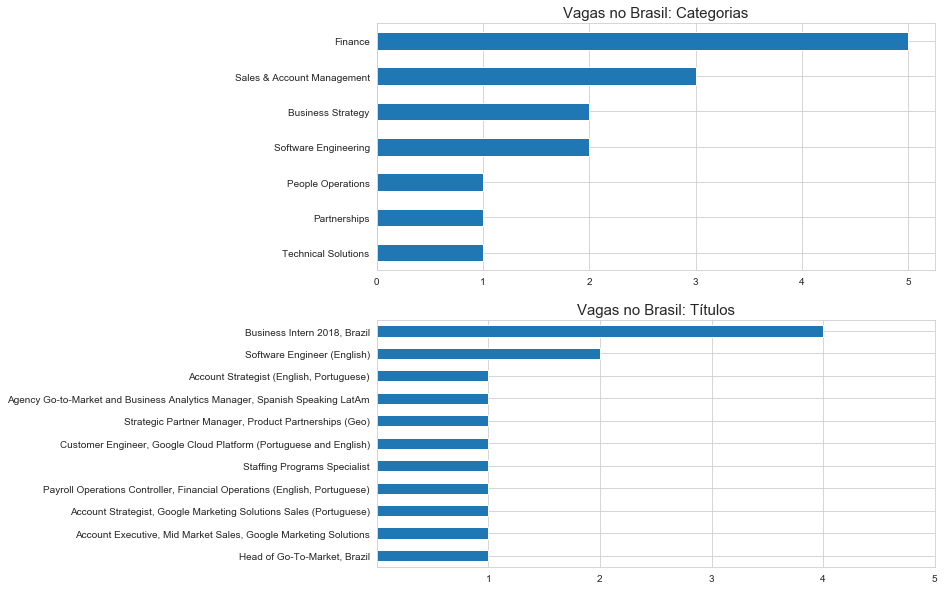

In [26]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
plt.title('Vagas no Brasil: Títulos', fontsize=15)
df[df['Countries']=='Brazil']['Title'].value_counts(ascending=True).plot(kind='barh')
plt.xticks([1,2,3,4,5])
plt.subplot(2,1,1)
plt.title('Vagas no Brasil: Categorias', fontsize=15)
df[df['Countries']=='Brazil']['Category'].value_counts(ascending=True).plot(kind='barh');


----------------------------------

# Categorias mais frequentes das vagas globais:

In [27]:
df['Category'].unique()

array(['Program Management', 'Manufacturing & Supply Chain',
       'Technical Solutions', 'Developer Relations',
       'Hardware Engineering', 'Partnerships',
       'Product & Customer Support', 'Software Engineering',
       'Data Center & Network', 'Business Strategy', 'Technical Writing',
       'Technical Infrastructure', 'IT & Data Management',
       'Marketing & Communications', 'Network Engineering',
       'Sales & Account Management', 'Sales Operations', 'Finance',
       'Legal & Government Relations', 'Administrative',
       'User Experience & Design', 'People Operations',
       'Real Estate & Workplace Services'], dtype=object)

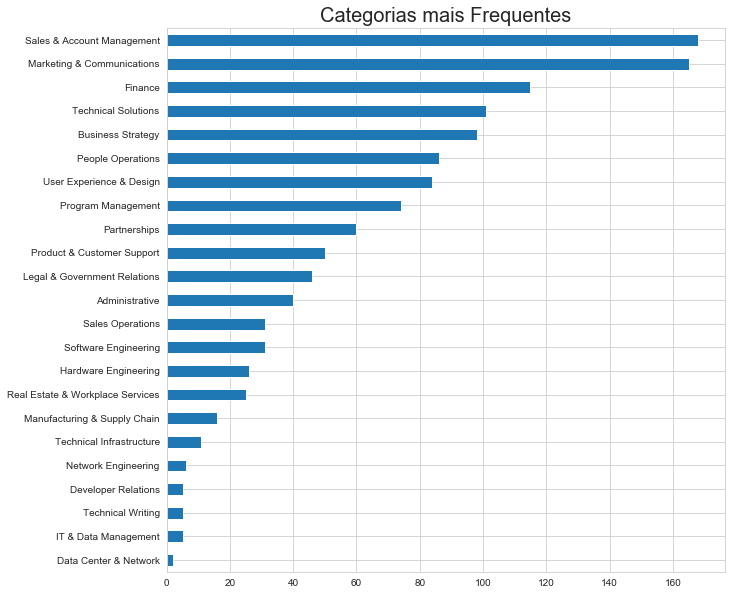

In [28]:
plt.figure(figsize=(10,10))
plt.title('Categorias mais Frequentes',  fontsize=20)
df['Category'].value_counts(ascending=True).plot(kind='barh');

In [29]:
df['Category'].value_counts(ascending=False)

Sales & Account Management          168
Marketing & Communications          165
Finance                             115
Technical Solutions                 101
Business Strategy                    98
People Operations                    86
User Experience & Design             84
Program Management                   74
Partnerships                         60
Product & Customer Support           50
Legal & Government Relations         46
Administrative                       40
Sales Operations                     31
Software Engineering                 31
Hardware Engineering                 26
Real Estate & Workplace Services     25
Manufacturing & Supply Chain         16
Technical Infrastructure             11
Network Engineering                   6
Developer Relations                   5
Technical Writing                     5
IT & Data Management                  5
Data Center & Network                 2
Name: Category, dtype: int64

As principais oportunidades são relacionadas a vendas e marketing e, em um terceiro lugar mais distante, finanças.

--------------------------------------------------------------------

# Qualificação mínima:

### Estudaremos a qualificação mínima quanto a:
1) Grau de formação;

2) Anos de experiência;

3) Habilidades relevantes: linguagem de programação, uso de ferramentas, etc;

Será interessante ter um primeiro contato visual com relação à qualificação mínima exigida, para guiar palpites e verificar informações relevantes com relação à frequência de palavras.
Optarei por criar um word_cloud como abordagem introdutória:

In [30]:
# Estou definindo uma função para poder usar posteriormente em outras colunas (não apenas em 'Minimum Qualification') caso
# seja necessário.

def cloud_from_column(df_column):
    
    ''' passe no formato df['column'] '''
    
    corpus = list(df_column.dropna().values) #criarei meu conjunto de informações a partir dos valores não nulos da coluna selecionada

    texto='' # inicializando uma string única que receberá os elementos da lista corpus.
    for string in corpus:
        texto = texto + ' ' + string

    wordcloud = WordCloud().generate(texto) #usarei a wWordCloud da biblioteca wordcloud

    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

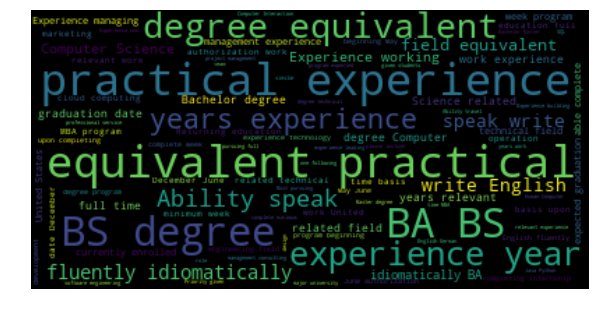

In [31]:
cloud_from_column(df['Minimum Qualifications'])

### Algumas detalhes chamam a atenção:
    - A menção a BA e BS, que são Bacharelado em Arte e Bacharelado em Ciências;
    - Menção à 'experiência prática' ou a 'equivalente prático';
    - 'Anos de experiência', 
    - Habilidades em idioma: 'Idiomaticamente fluente', 'escrever em inglês'.
    - Formação: 'Science related', 'Computer Science'

In [32]:
# Vou explorar um pouco mais a fundo:

df['Minimum Qualifications'].unique()

array(['BA/BS degree or equivalent practical experience.\n3 years of experience in program and/or project management in cloud computing, enterprise software and/or marketing technologies.',
       'BS degree in an Engineering discipline or equivalent practical experience.\n7 years of experience in Cable/Connector Design or Manufacturing in an NPI role.\nExperience working with Interconnect Engineering and Product Design (PD)/Mechanical Engineer in developing, manufacturing and testing.\nAbility to speak and write in English and Mandarin fluently and idiomatically.',
       'Bachelor’s degree in Business, Economics, Statistics, Operations Research or related analytical field, or equivalent practical experience.\n2 years of work experience in business analysis.\n1 year of experience with statistical modeling, forecasting or machine learning. Experience with R, SAS or Python.\n1 year of experience developing and manipulating large datasets.',
       'BA/BS degree in Computer Science or eq

In [33]:
df['Minimum Qualifications'].nunique()/df['Minimum Qualifications'].count() #65% de descrições únicas.

0.6529126213592233

In [34]:
df[df.duplicated()].shape[0] #Por sinal, 123 vagas são idênticas em todos os aspectos às outras.

123

Criarei mais uma coluna relacionada ao grau da formação mínima exigida.

Existe um certo padrão entre as descrições de 'Minimum Qualifications' em que a descrição do nível desejado precede a palavra degree. Faremos uso deste padrão na criação de uma nova coluna a seguir:

In [35]:
df['MQ_degree'] = df['Minimum Qualifications'].dropna().apply(lambda x: x.lower().split('degree')[0].strip())

In [36]:
df['MQ_degree'].nunique()

117

In [37]:
# Explorando brevemente o resultado, foi possível constatar a ocorrência mais frequente de 
# determinados padrões que agora buscarei resgatar:

def find_degree(string):
    if 'ba/bs' in string:
        string = 'ba/bs'
    if ' ba ' in string:
        string = 'ba'
    if ' bs ' in string:
        string = 'bs'
    if 'phd' in string:
        string = 'phd'
    if 'ph.d' in string:
        string = 'phd'      
    if 'jd' in string:
        string = 'jd'
    if 'j.d.' in string:
        string = 'jd'
    if 'ms' in string:
        string = 'ms'
    if 'master' in string:
        string = 'ms'
    if 'bachelor' in string:
        string = 'bachelor'
    if 'mba' in string:
        string = 'mba'
    if 'major' in string:
        string = 'major'
    return string

df['MQ_degree'] = df['MQ_degree'].dropna().apply(find_degree)

In [38]:
df['MQ_degree'].nunique()

59

In [39]:
df['MQ_degree'].unique()

array(['ba/bs', 'bs', 'bachelor', nan, 'phd',
       '7 years of experience in a technical training role.\n5 years of experience in a management role.\nexperience in managing team of technical trainers.',
       '5 years of experience in supply chain operations across technical and/or networking fields.\nexperience in a program management role, leading data management solutions.',
       'experience managing analytics solutions.\nexperience managing client expectations, requirements. experience in conflict resolution.\nability to speak and write in english fluently and idiomatically.',
       'ms',
       '5 years of experience in a training business and/or as a channel manager.\nexperience with business development and experience in identifying, recruiting and managing partners and delivering go-to-market strategies.\nwillingness to travel across the americas (north america and latin america).',
       'コンピュータ サイエンスまたは関連する技術分野で学士号を取得していること（関連職種での実務経験でも可）\nc、c++ を使用したプログラミング経験\nドライバや、l

In [40]:
df

Company                                              Title  \
0      Google                       Google Cloud Program Manager   
1      Google  Supplier Development Engineer (SDE), Cable/Con...   
2      Google  Data Analyst, Product and Tools Operations, Go...   
3      Google            Developer Advocate, Partner Engineering   
4      Google     Program Manager, Audio Visual (AV) Deployments   
5      Google  Associate Account Strategist (Czech/Slovak), G...   
6      Google  Supplier Development Engineer, Camera, Consume...   
7      Google  Strategic Technology Partner Manager, Healthca...   
8      Google    Manufacturing Business Manager, Google Hardware   
9      Google  Solutions Architect, Healthcare and Life Scien...   
10     Google                    Data Analyst, Consumer Hardware   
11     Google              Partner Onboarding Manager (Americas)   
12     Google  Associate Account Strategist (Ukrainian), GMS ...   
13     Google                  Survey Lead, Google Cloud Support   
14     Google  Solution Architect, Google Cloud Platform (Api...   
15     Google                        Manufacturing Test Engineer   
16     Google  Machine Learning Product Specialist, Google Cl...   
17     Google  Software Engineering Manager, Cloud Storage, S...   
18     Google  Global Supply Chain Manager, Display/Touch, Co...   
19     Google        Technical Program Manager, ASIC Development   
20     Google                  Quantitative Analyst, Ads Quality   
21     Google  Software Engineer Manager, Tools and Infrastru...   
22     Google                      Head of Professional Services   
23     Google                  Survey Lead, Google Cloud Support   
24     Google            Technical Trainer Manager, Google Cloud   
25     Google               Partner Sales Engineer, Google Cloud   
26     Google  Technical Solutions Engineer, Chrome and Andro...   
27     Google      Program Manager, Supply Chain Data Management   
28     Google  Machine Learning Product Specialist, Google Cl...   
29     Google          Head of Partner Engineering, Google Cloud   
...       ...                                                ...   
1220   Google  Change Management Specialist, Google Professio...   
1221   Google         Live Show Producer, Events and Experiences   
1222   Google       Cluster Manager, Security (English, Chinese)   
1223   Google       Cluster Manager, Security (English, Chinese)   
1224   Google              Campus Manager (English and Mandarin)   
1225   Google                Real Estate Portfolio Administrator   
1226  YouTube  Real Estate and Workplace Services (REWS) Busi...   
1227   Google          Communications Analyst, Physical Security   
1228   Google   Global REWS Marketing and Communications Manager   
1229   Google  Technical Program Manager, Executive and Event...   
1230   Google                  Project Manager, Security Systems   
1231   Google       Cluster Manager, Security (English, Chinese)   
1232   Google                                Global Investigator   
1233   Google         Real Estate District Development Executive   
1234   Google                                Global Investigator   
1235   Google                          Physical Security Manager   
1236   Google                     Food Service Manager, Americas   
1237   Google                     Food Service Manager, Americas   
1238   Google  Program Manager, Third Party Risk Management (...   
1239   Google              Real Estate Portfolio Management Lead   
1240   Google            Visual Designer, Events and Experiences   
1241   Google                  Real Estate Development Executive   
1242   Google                          Physical Security Manager   
1243   Google       Cluster Manager, Security (English, Chinese)   
1244   Google  Protective Services Specialist, Executive Prot...   
1245   Google                                Global Investigator   
1246   Google                            Campus Security Manag

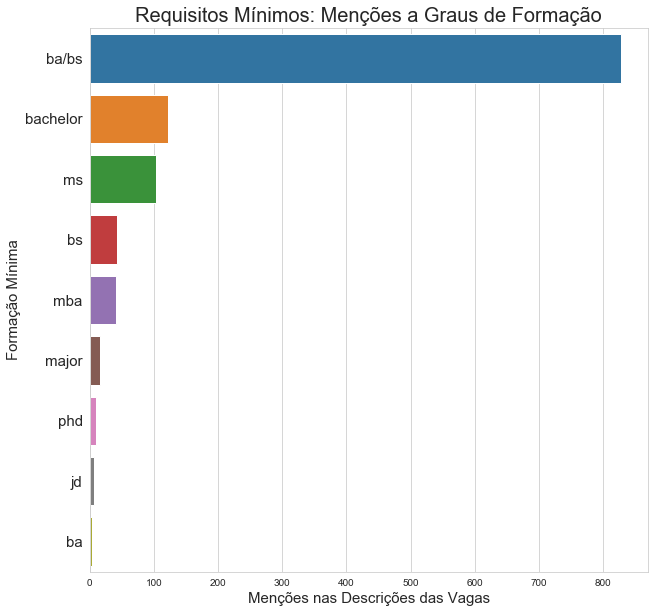

In [41]:
# selecionando apenas os títulos principais para criar uma visualização
masked = df[df['MQ_degree'].isin(['ba/bs', 'ba','bs', 'bachelor', 'ms', 'jd', 'phd', 'mba', 'major'])]


plt.figure(figsize=(10,10))
plt.title('Requisitos Mínimos: Menções a Graus de Formação', fontsize=20)
sns.countplot(y='MQ_degree', data=df, order = masked['MQ_degree'].value_counts().index )
plt.yticks(fontsize=15)
plt.xticks(fontsize=10)
plt.xlabel('Menções nas Descrições das Vagas', fontsize=15)
plt.ylabel('Formação Mínima', fontsize=15);

# Um detalhe importante é que o gráfico a seguir separa as menções conjuntas a BA/BS de ocorrências isoladas de BA e BS. 
# Manterei a visualização desta forma apenas para registrar a indiferença quanto a BA (Bacharelado em Artes) e BS (Bacharelado em Ciências)
# por parte do recrutador.

Ter um bacharelado é, definitivamente, um requisito importante.

A principal descrição mais frequente refere-se a 'BA/BS', ou melhor, Bacharelado em Artes ou Bacharelado em Ciências.

A segunda descrição consta simplesmente como Bacharelado. Sendo seguido por Mestrado, MBA, Major, PHD e JD (Juris Doctor).

Quanto aos 'degrees' usei como referência o site https://study.com/different_degrees.html para ter um entendimento mais profundo.

## Buscarei brevemente entender como a exigência quanto a graus de formação se distribui em relação às categorias das vagas:

In [42]:
grau_de_formação = pd.pivot_table(data=df[df['MQ_degree'].isin(['ba/bs','ba','bs','bachelor','ms','jd','phd','mba','major'])],
                                  index=['Category'], 
                                  columns=['MQ_degree'], 
                                  aggfunc={'Company':'count'}).reset_index()

In [43]:
grau_de_formação.fillna(value=0, inplace=True) # Para fazer cálculos, substituirei NaN por 0

In [44]:
grau_de_formação.head()

Category Company                                       \
MQ_degree                             ba ba/bs bachelor   bs   jd major   mba   
0                 Administrative     0.0  10.0      0.0  0.0  0.0   0.0   2.0   
1              Business Strategy     0.0  46.0      3.0  0.0  0.0   0.0  37.0   
2          Data Center & Network     0.0   0.0      0.0  1.0  0.0   0.0   0.0   
3            Developer Relations     0.0   5.0      0.0  0.0  0.0   0.0   0.0   
4                        Finance     0.0  79.0      6.0  0.0  0.0  16.0   0.0   

                      
MQ_degree    ms  phd  
0          28.0  0.0  
1           6.0  2.0  
2           0.0  0.0  
3           0.0  0.0  
4           6.0  0.0

In [45]:
grau_de_formação.columns

MultiIndex(levels=[['Company', 'Category'], ['ba', 'ba/bs', 'bachelor', 'bs', 'jd', 'major', 'mba', 'ms', 'phd', '']],
           codes=[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [9, 0, 1, 2, 3, 4, 5, 6, 7, 8]],
           names=[None, 'MQ_degree'])

In [46]:
grau_de_formação.columns = grau_de_formação.columns.droplevel() #retirando um dos níveis de coluna, para facilitar a manipulação e compreensão.

In [47]:
grau_de_formação.head()

MQ_degree                          ba  ba/bs  bachelor   bs   jd  major   mba  \
0                 Administrative  0.0   10.0       0.0  0.0  0.0    0.0   2.0   
1              Business Strategy  0.0   46.0       3.0  0.0  0.0    0.0  37.0   
2          Data Center & Network  0.0    0.0       0.0  1.0  0.0    0.0   0.0   
3            Developer Relations  0.0    5.0       0.0  0.0  0.0    0.0   0.0   
4                        Finance  0.0   79.0       6.0  0.0  0.0   16.0   0.0   

MQ_degree    ms  phd  
0          28.0  0.0  
1           6.0  2.0  
2           0.0  0.0  
3           0.0  0.0  
4           6.0  0.0

In [48]:
# O que farei agora é desmembrar a menção a 'ba/bs' em categorias 'ba' e 'bs' e retirarei a menção dupla.
# Vale lembrar que, com isso, cada vaga poderá ter mais de um 'representante' em grau de formação desejado.
grau_de_formação['ba'] = grau_de_formação['ba'] + grau_de_formação['ba/bs']
grau_de_formação['bs'] = grau_de_formação['bs'] + grau_de_formação['ba/bs']
grau_de_formação.drop(columns=['ba/bs'], inplace=True)

In [49]:
# Agora criarei uma coluna para computar o grau de menções feitos ao grau de formação para cada categoria.
grau_de_formação['totais_mencionados'] =  grau_de_formação['ba'] + grau_de_formação['bs'] + grau_de_formação['bachelor'] + grau_de_formação['jd'] + grau_de_formação['major'] + grau_de_formação['mba'] + grau_de_formação['ms'] + grau_de_formação['phd']

In [50]:
# Finalmente, um registro em tabela dos graus de formação exigidos:
grau_de_formação.sort_values(by='totais_mencionados', ascending=False)

MQ_degree                                       ba  bachelor     bs   jd  \
16               Sales & Account Management  138.0      20.0  140.0  0.0   
9                Marketing & Communications  116.0       8.0  114.0  0.0   
4                                   Finance   79.0       6.0   79.0  0.0   
12                        People Operations   81.0       3.0   81.0  0.0   
20                      Technical Solutions   68.0      23.0   73.0  0.0   
1                         Business Strategy   46.0       3.0   46.0  0.0   
22                 User Experience & Design   56.0      10.0   57.0  0.0   
14                       Program Management   40.0      16.0   44.0  0.0   
11                             Partnerships   43.0      11.0   45.0  0.0   
13               Product & Customer Support   35.0       6.0   36.0  0.0   
17                         Sales Operations   30.0       1.0   30.0  0.0   
7              Legal & Government Relations   24.0       3.0   24.0  7.0   
0                            Administrative   10.0       0.0   10.0  0.0   
15         Real Estate & Workplace Services   22.0       3.0   22.0  0.0   
18                     Software Engineering   10.0       0.0   17.0  0.0   
5                      Hardware Engineering    6.0       5.0   14.0  0.0   
8              Manufacturing & Supply Chain    9.0       3.0   11.0  0.0   
19                 Technical Infrastructure    4.0       1.0    9.0  0.0   
10                      Network Engineering    4.0       0.0    6.0  0.0   
3                       Developer Relations    5.0       0.0    5.0  0.0   
21                        Technical Writing    5.0       0.0    5.0  0.0   
6                      IT & Data Management    0.0       0.0    2.0  0.0   
2                     Data Center & Network    0.0       0.0    1.0  0.0   

MQ_degree  major   mba    ms  phd  totais_mencionados  
16           0.0   0.0   3.0  0.0               301.0  
9            0.0   0.0  38.0  0.0               276.0  
4           16.0   0.0   6.0  0.0               186.0  
12           0.0   0.0   0.0  0.0               165.0  
20           0.0   0.0   0.0  0.0               164.0  
1            0.0  37.0   6.0  2.0               140.0  
22           0.0   0.0   9.0  0.0               132.0  
14           0.0   0.0   3.0  0.0               103.0  
11           0.0   2.0   0.0  0.0               101.0  
13           0.0   0.0   3.0  5.0                85.0  
17           0.0   0.0   0.0  0.0                61.0  
7            0.0   0.0   0.0  0.0                58.0  
0            0.0   2.0  28.0  0.0                50.0  
15           0.0   0.0   0.0  0.0                47.0  
18           0.0   0.0   4.0  0.0                31.0  
5            0.0   0.0   2.0  0.0                27.0  
8            0.0   0.0   0.0  0.0                23.0  
19           0.0   0.0   1.0  0.0                15.0  
10           0.0   0.0   0.0  0.0                10.0  
3            0.0   0.0   0.0  0.0                10.0  
21           0.0   0.0   0.0  0.0                10.0  
6            0.0   0.0   0.0  3.0                 5.0  
2            0.0   0.0   0.0  0.0                 1.0

In [51]:
tabela_grau_formacao = pd.DataFrame(grau_de_formação.drop(columns=['totais_mencionados']).sum()).reset_index().iloc[1:8]

In [52]:
tabela_grau_formacao.set_index('MQ_degree', drop=True, inplace=True)


In [53]:
tabela_grau_formacao.columns = ['contagem']
tabela_grau_formacao.sort_values(by='contagem', ascending=False)

contagem
MQ_degree         
bs             871
ba             831
bachelor       122
ms             103
mba             41
major           16
jd               7

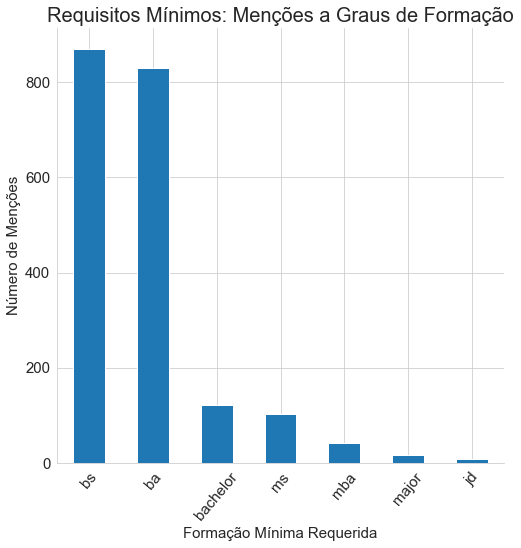

In [54]:
tabela_grau_formacao.sort_values(by='contagem', ascending=False).plot(kind='bar', figsize=(8,8), legend=None)
plt.title('Requisitos Mínimos: Menções a Graus de Formação', fontsize=20)
plt.ylabel('Número de Menções', fontsize=15)
plt.xlabel('Formação Mínima Requerida', fontsize=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=50);

# Lembremos que há vagas que mencionam mais de um grau, e estamos contando as menções de forma que estão inflando a quantidade de oportunidades.

# ANOS DE EXPERIÊNCIA: 

## Passemos a verificar a quantidade de anos de experiência exigidos em cada vaga.

Criarei mais uma coluna que registre o número de anos de experiência exigido pela vaga.
Geralmente a menção a anos de experiência vem no formado: **um ou mais algarismos + 'year'**. (**Regex:** *r'([0-9]+) year'*)

Detalhe que coloquei year no singular porque este padrão servirá tanto para casos como [1 year] quanto para [2 year]s, por exemplo.
Farei uso deste padrão e utilizarei regex para capturar todos os casos.

Obs: verifiquei que nem todas as menções a anos sugerem necessariamente anos de experiência (em um caso, por exemplo, 
refere-se à idade de crianças). Ainda assim, o padrão é suficientemente geral para que eu aceite o risco de errar poucas 
vezes e tenha que refinar o tratamento mais tarde.

In [55]:
def find_year(string):
    finded = re.findall(r'([0-9]+) year', string) #encontrando descrições no formado: um ou mais algarismos + 'year'. Manterei apenas a parte numérica.
    try: 
        finded = finded[0] #manterei apenas a primeira menção a anos de experiência, considerando que o mais relevante costuma ser mencionado antes
        return finded 
    except:
        return finded

df['Years of Experience'] = df['Minimum Qualifications'].dropna().apply(lambda x: find_year(x.lower())) 

In [56]:
df['Years of Experience'] = df['Years of Experience'].apply(lambda x: int(x) if type(x)==str else 0) 
# aqui estou transformando o texto em inteiro. E onde o padrão não foi identificado estou assumindo que não houve menção a
# anos prévios de experiência.

df['Years of Experience']

0        3
1        7
2        2
3        0
4        4
5        0
6       10
7        5
8        5
9        0
10       4
11       5
12       0
13       5
14       0
15       0
16       0
17       0
18       3
19       5
20       0
21       0
22       0
23       5
24       7
25       0
26       0
27       5
28       0
29      10
        ..
1220     2
1221     6
1222    10
1223    10
1224     5
1225     5
1226     5
1227     1
1228    10
1229     7
1230     5
1231    10
1232     4
1233    10
1234     4
1235     0
1236     0
1237     0
1238     7
1239    10
1240     5
1241    10
1242     0
1243    10
1244     5
1245     4
1246     7
1247     8
1248     0
1249     0
Name: Years of Experience, Length: 1250, dtype: int64

### Quero verificar se a ausência do padrão usado em minha Regex significa não menção a anos de experiência:

In [57]:
df[df['Years of Experience']==0].head(3)

Company                                              Title  \
3  Google            Developer Advocate, Partner Engineering   
5  Google  Associate Account Strategist (Czech/Slovak), G...   
9  Google  Solutions Architect, Healthcare and Life Scien...   

              Category                          Location  \
3  Developer Relations  Mountain View, CA, United States   
5  Technical Solutions                   Dublin, Ireland   
9  Technical Solutions       New York, NY, United States   

                                    Responsibilities  \
3  Work one-on-one with the top Android, iOS, and...   
5  Communicate with customers via phone and email...   
9  Help compile customer requirements as well as ...   

                              Minimum Qualifications  \
3  BA/BS degree in Computer Science or equivalent...   
5  Bachelor's degree or equivalent practical expe...   
9  BA/BS degree in Computer Science, related Soft...   

                            Preferred Qualifications Countries MQ_degree  \
3  Experience as a software developer, architect,...       USA     ba/bs   
5  Experience in sales, customer service, account...   Ireland  bachelor   
9  Master's degree in Computer Science, related E...       USA     ba/bs   

   Years of Experience  
3                    0  
5                    0  
9                    0

In [58]:
df.iloc[3]['Minimum Qualifications']

'BA/BS degree in Computer Science or equivalent practical experience.\nExperience working directly with partners.\nProgramming experience in one or more of the following languages/platforms: Android, Java, Kotlin, iOS, Javascript.'

In [59]:
df.iloc[5]['Minimum Qualifications']

"Bachelor's degree or equivalent practical experience.\nAbility to speak and write in English and Czech and/or Slovak fluently and idiomatically."

In [60]:
df.iloc[9]['Minimum Qualifications']

'BA/BS degree in Computer Science, related Software Engineering field or equivalent practical experience.\nExperience working in a cloud computing environment (infrastructure, storage, platforms and/or data).\nExperience working in a healthcare and/or life science domain, including deploying solutions in healthcare and/or life sciences related IT infrastructure.\nExperience in writing software in one or more languages such as Java, Python, Go, JavaScript, C++, or similar.'

#### Aparentemente fomos certeiros. Investigarei mais casos:

In [61]:
df[df['Years of Experience']==0]['Minimum Qualifications'].values

# Um outro padrão que é possível verificar é o formato 'n-year' relacionado à duração de cursos de graduação que o
# candidato deve estar cursando, como em: '4-year BA/BS program'. Este padrão 'número traço ano' felizmente não é buscado 
# pelo padrão que utilizamos anteriormente, pois não deve ser confundido
# com o número de anos relacionado à experiência prévia. Tudo está correndo bem! :)

array(['BA/BS degree in Computer Science or equivalent practical experience.\nExperience working directly with partners.\nProgramming experience in one or more of the following languages/platforms: Android, Java, Kotlin, iOS, Javascript.',
       "Bachelor's degree or equivalent practical experience.\nAbility to speak and write in English and Czech and/or Slovak fluently and idiomatically.",
       'BA/BS degree in Computer Science, related Software Engineering field or equivalent practical experience.\nExperience working in a cloud computing environment (infrastructure, storage, platforms and/or data).\nExperience working in a healthcare and/or life science domain, including deploying solutions in healthcare and/or life sciences related IT infrastructure.\nExperience in writing software in one or more languages such as Java, Python, Go, JavaScript, C++, or similar.',
       "Bachelor's degree or equivalent practical experience.\nExperience or internship experience in sales, customer s

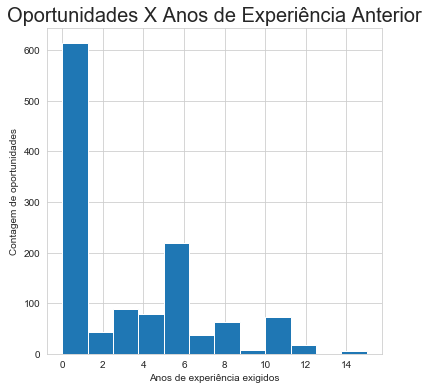

In [62]:
# Histograma: distribuição de anos de experiência mais solicitados



df['Years of Experience'].hist(bins=12, figsize=(6,6))
plt.title('Oportunidades X Anos de Experiência Anterior', fontsize=20)
plt.xlabel('Anos de experiência exigidos')
plt.ylabel('Contagem de oportunidades');

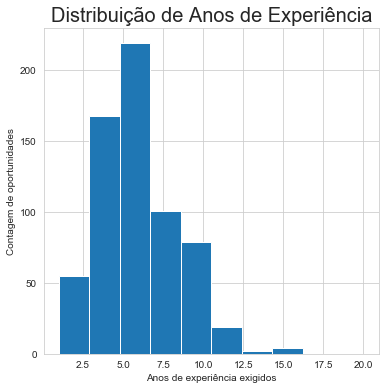

In [63]:
# Histograma: distribuição de anos de experiência mais solicitados (retirando o 0)

df['Years of Experience'].hist(bins=10, range=[1,20], figsize=(6,6)) # Retirando o 0 da visualização
plt.title('Distribuição de Anos de Experiência', fontsize=20)
plt.xlabel('Anos de experiência exigidos')
plt.ylabel('Contagem de oportunidades'); 

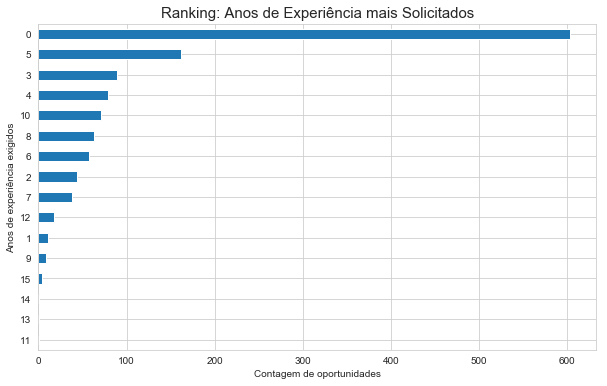

In [64]:
# Em um ranking de anos de experiência mais solicitados:

df['Years of Experience'].value_counts(ascending=True).plot(kind='barh', figsize=(10,6))
plt.title('Ranking: Anos de Experiência mais Solicitados', fontsize=15)
plt.xlabel('Contagem de oportunidades')
plt.ylabel('Anos de experiência exigidos'); 

### Pretendo agora verificar como estes anos de experiência exigidos são distribuídos nas diversas categorias de vagas:

In [65]:
#Primeiro criarei uma lista ordenada dos anos de experiência solicitados:

anos_de_experiência = list((df['Years of Experience'].unique()))

anos_de_experiência.sort()

anos_de_experiência

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

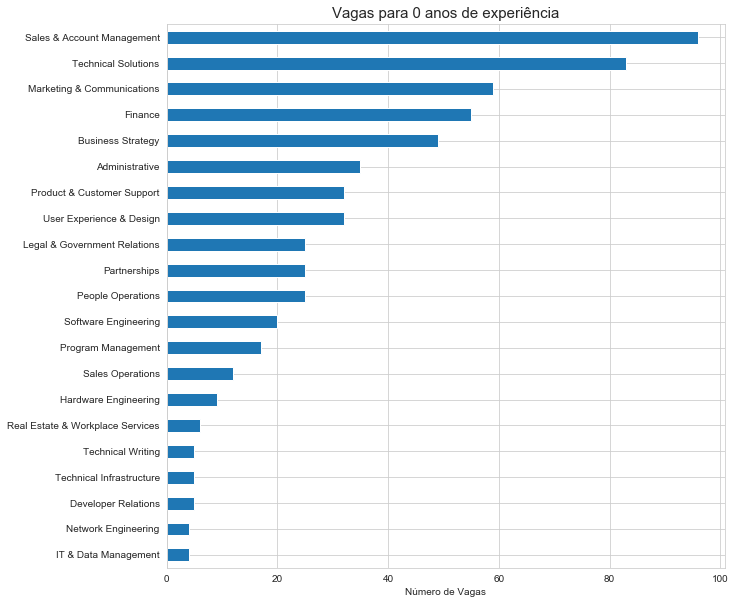

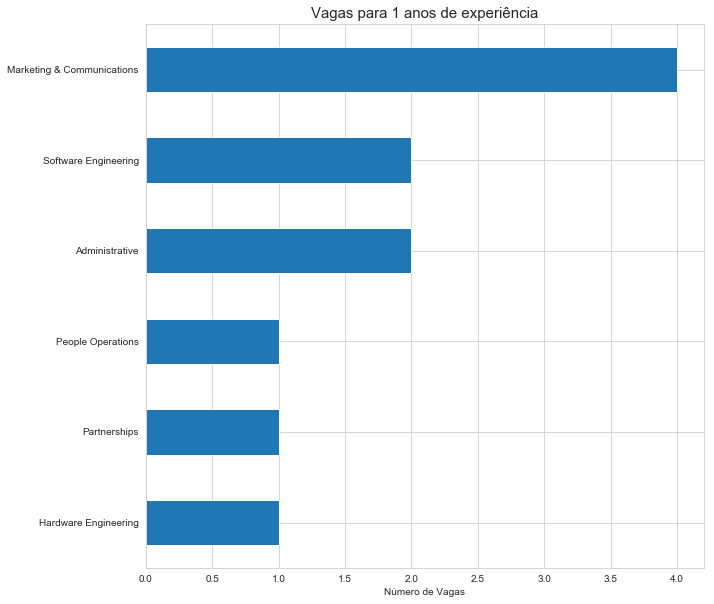

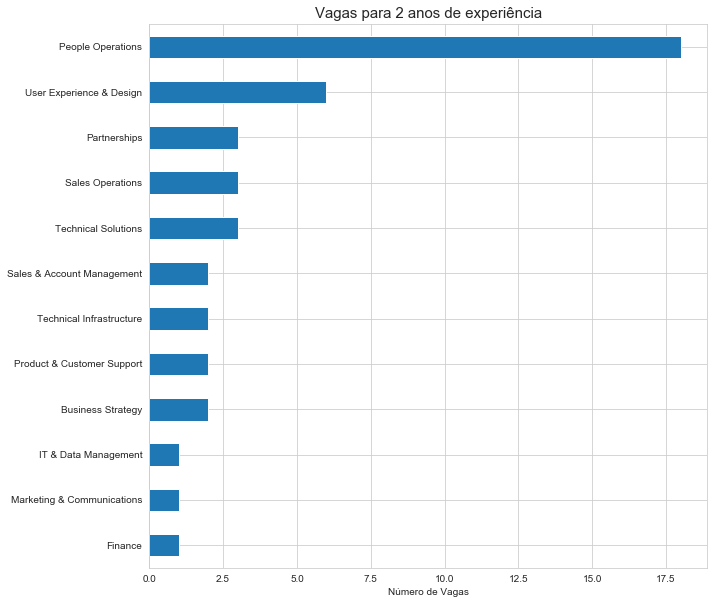

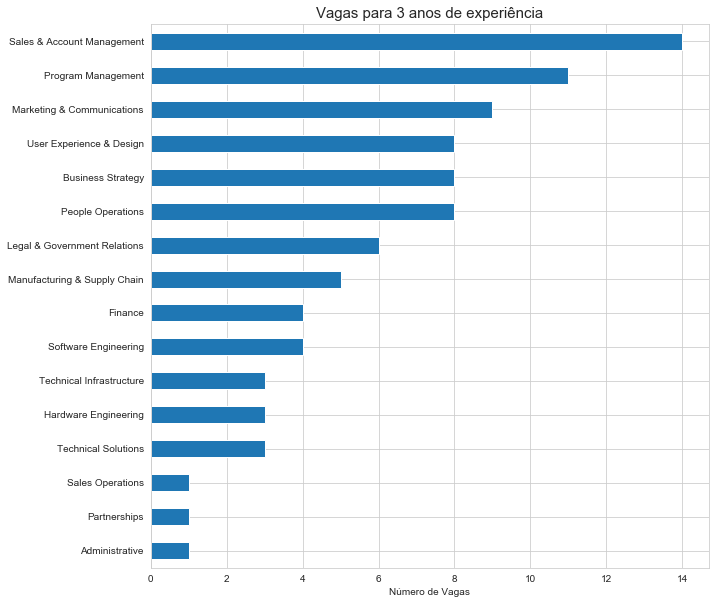

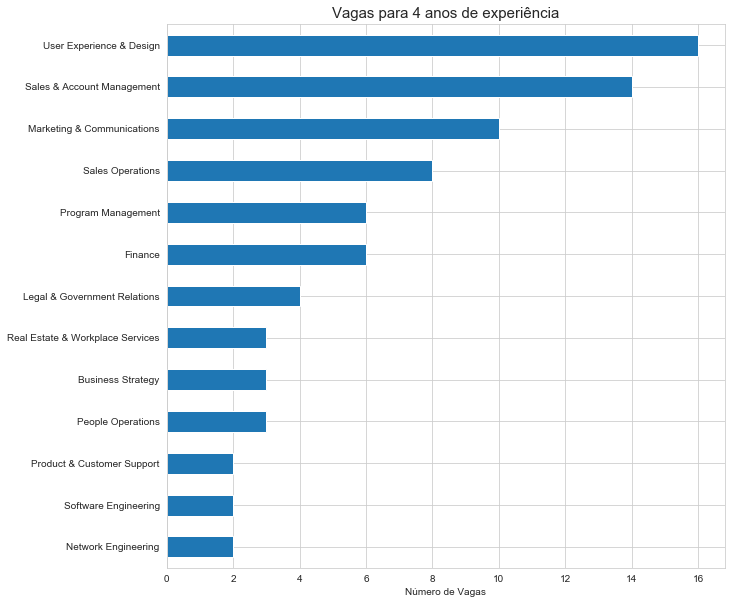

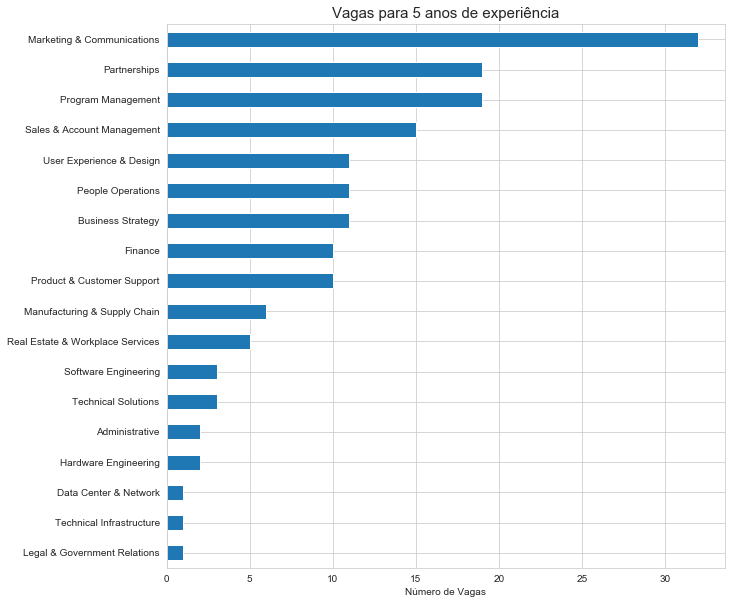

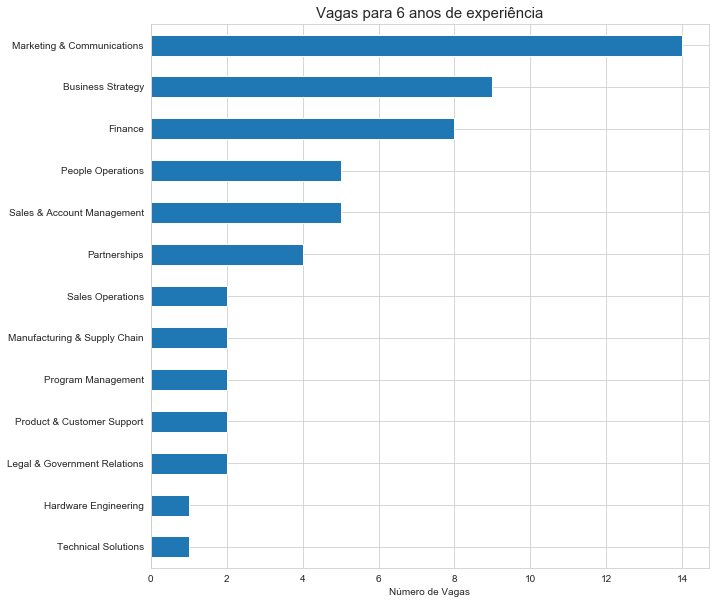

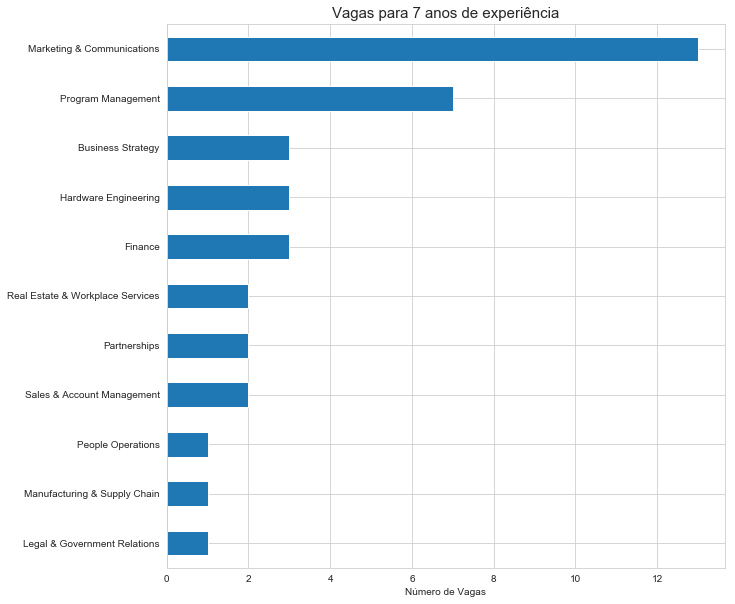

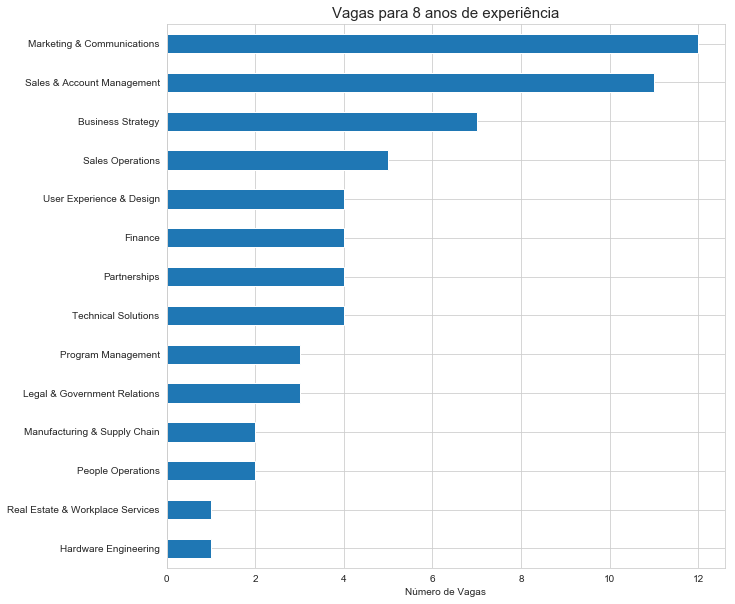

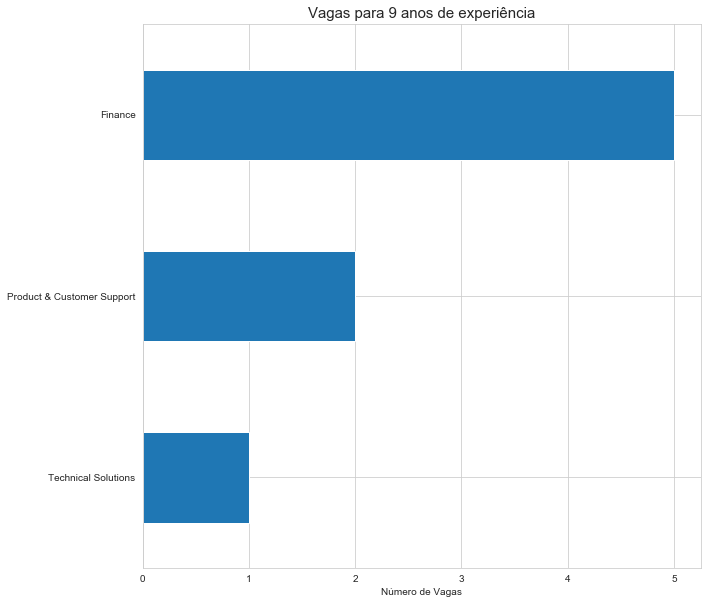

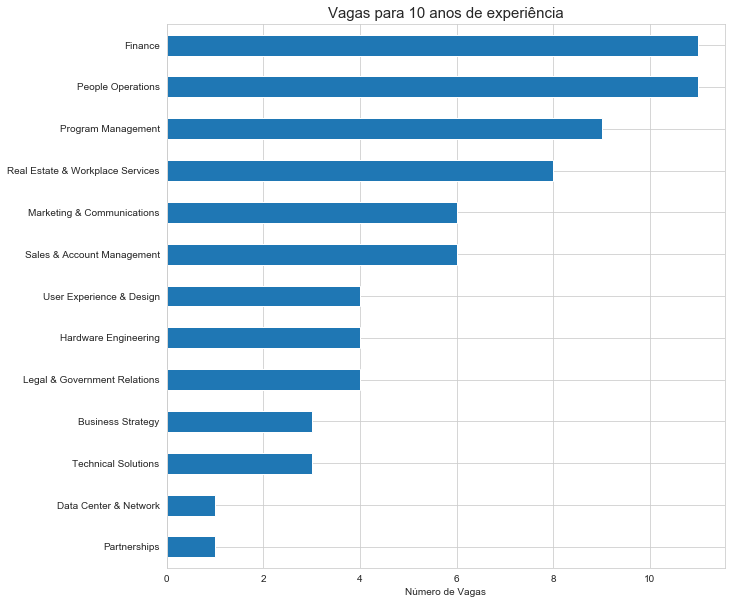

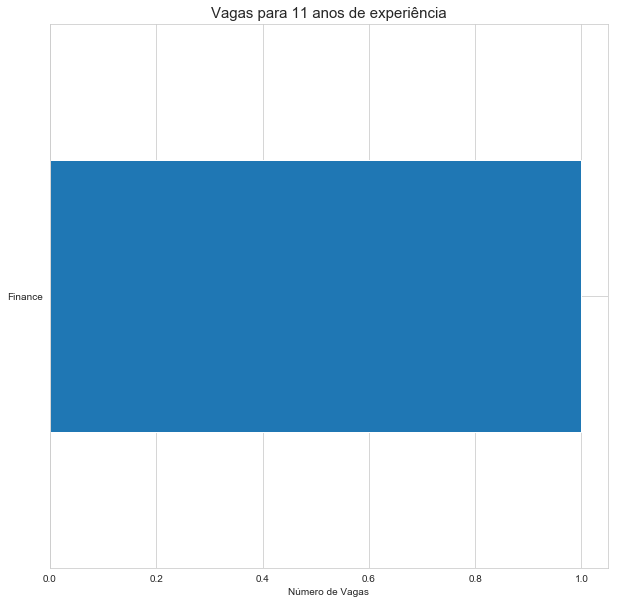

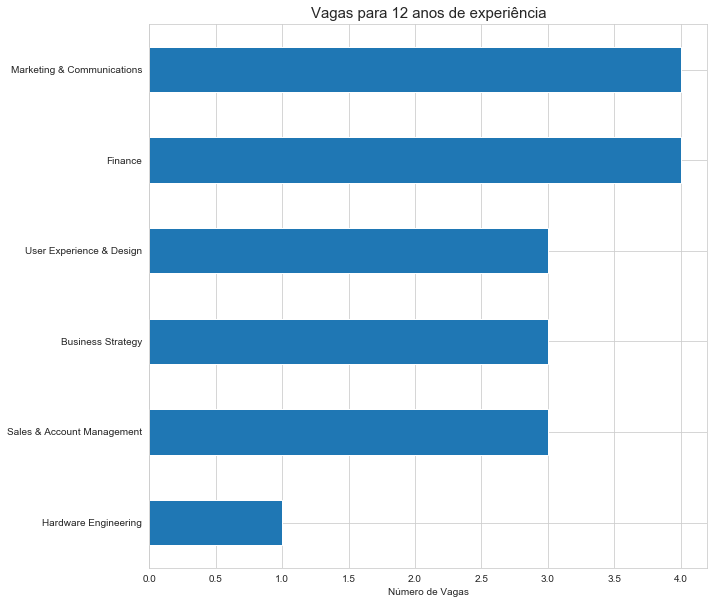

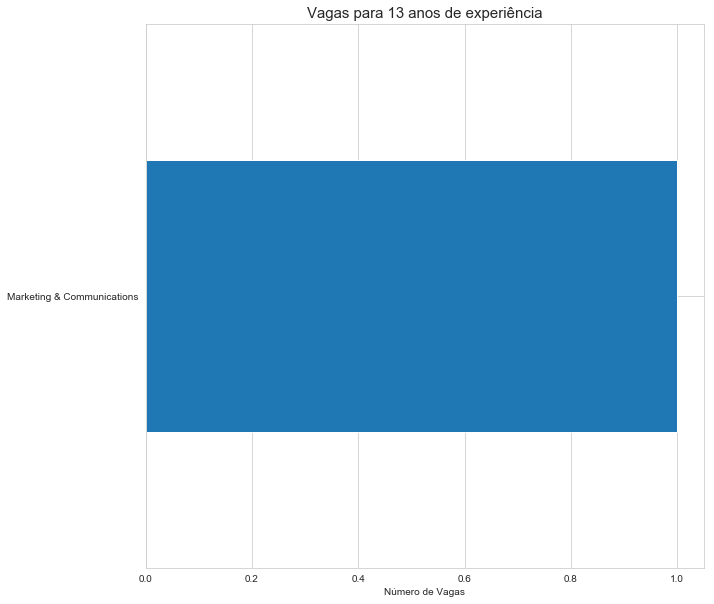

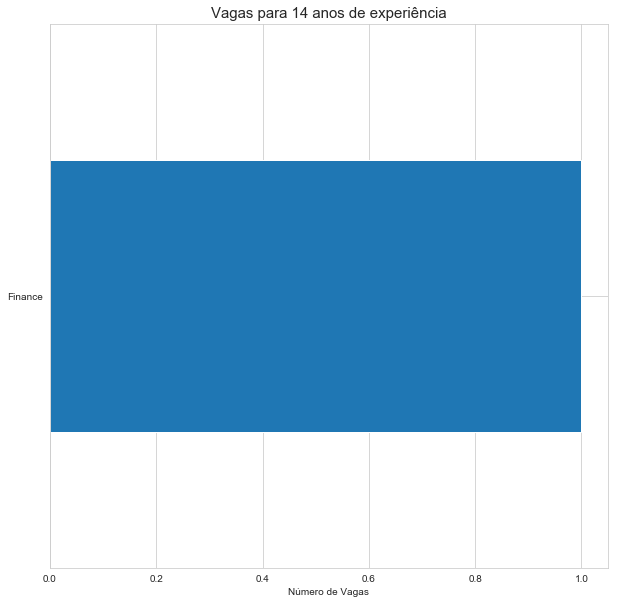

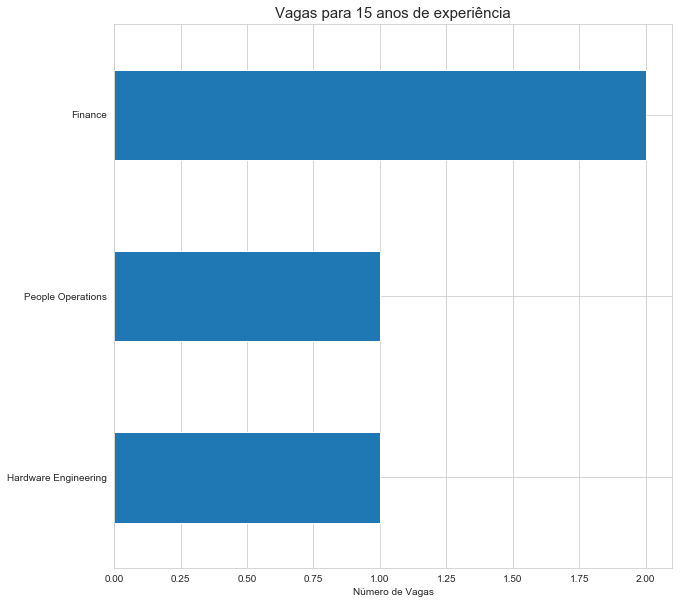

In [66]:
# Agora, para cada ano de experiência mencionado nas vagas, quero saber quantas oportunidades existem em cada categoria de vaga. 

for year in anos_de_experiência:
    
    plt.title('Vagas para {} anos de experiência'.format(year), fontsize=15)
    plt.xlabel('Número de Vagas', fontsize=10)
    df[df['Years of Experience']==year].Category.value_counts(ascending=True).plot(kind='barh', figsize=(10,10))
    plt.show()

### OBS: As oportunidades mudam bastante de acordo com o número de anos de experiência acumulada em determinada área.

#### Nota-se, por exemplo, o grande número de vagas para as áreas de vendas e soluções técnicas que não mencionam experiência prévia.

#### Por outro lado, diversas vagas de Finanças exigem muitos anos de experiência.

### Buscarei ilustrar estes pontos com um gráfico abaixo:

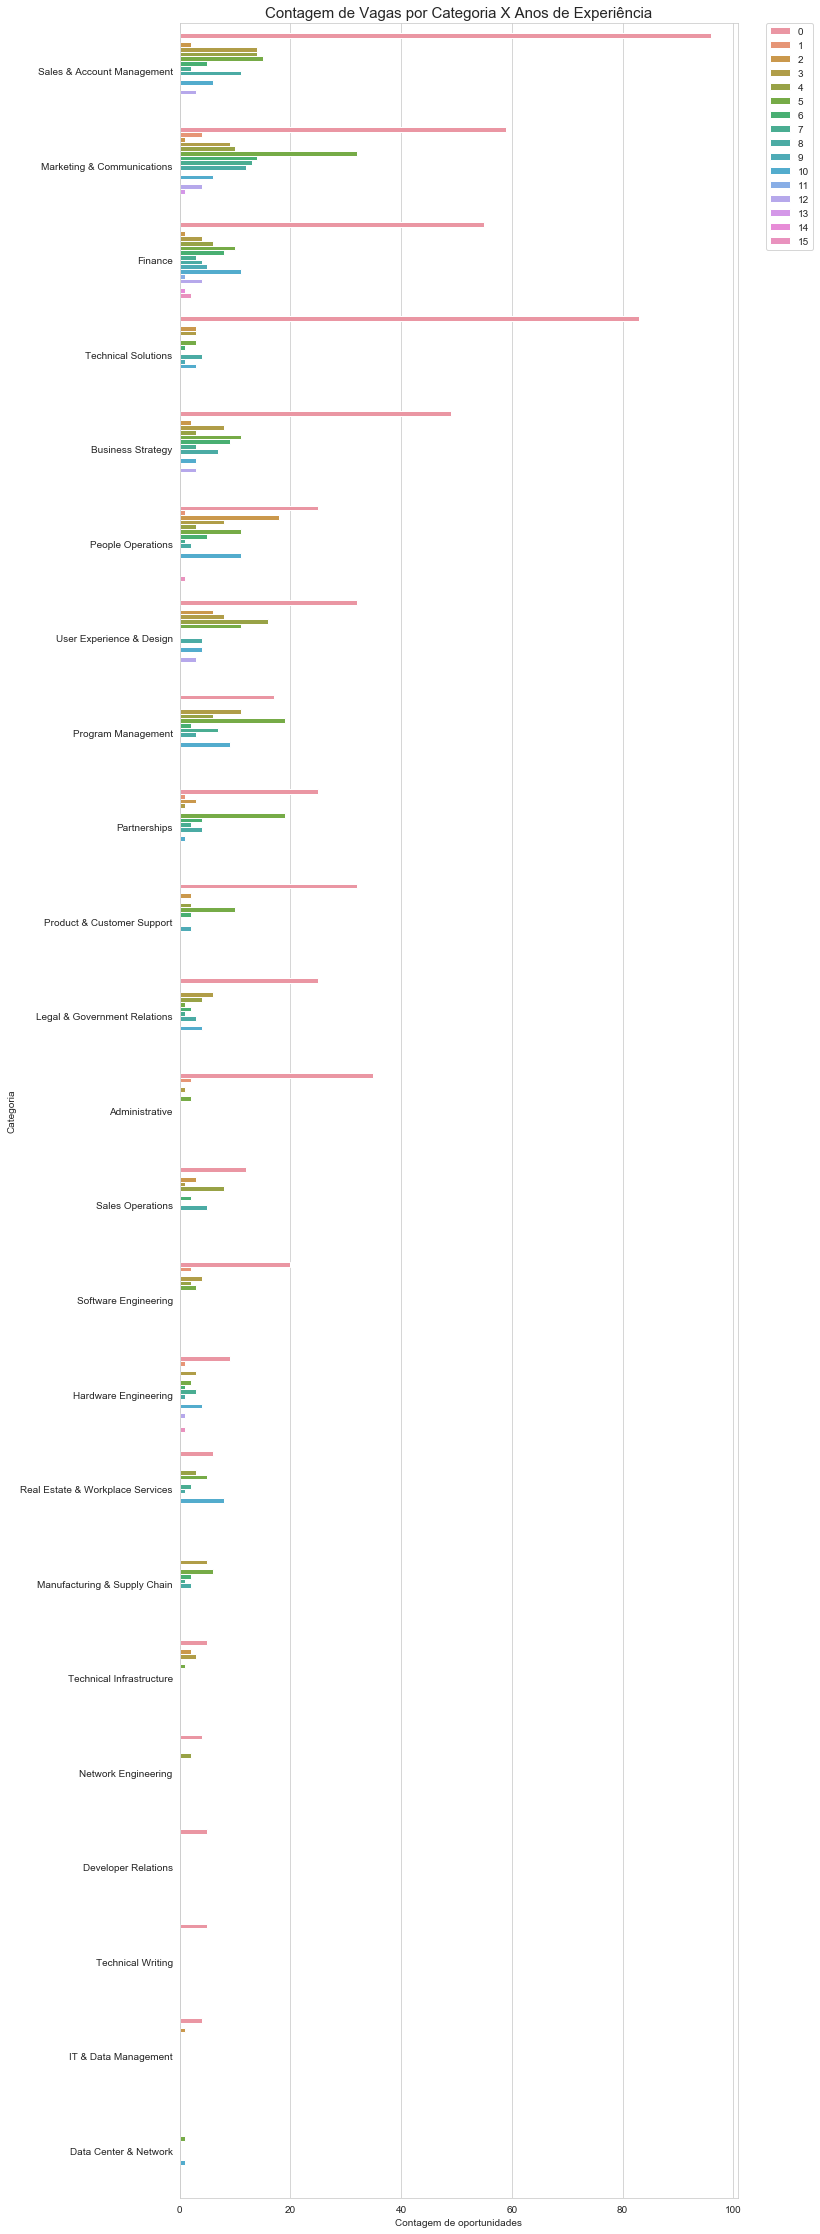

In [67]:
plt.figure(figsize=(10,40))
plt.title('Contagem de Vagas por Categoria X Anos de Experiência', fontsize=15)
sns.countplot(y='Category', data=df, order = df['Category'].value_counts().index, hue='Years of Experience')
plt.xlabel('Contagem de oportunidades')
plt.ylabel('Categoria')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

# Linguagens de programação

### Agora vamos analisar que linguagens de programação e tecnologias similares são mais requisitadas nas vagas:

Adotei como ponto de partida o seguinte site para facilitar minha busca por linguagens de programação:
https://www.ubuntupit.com/top-20-most-popular-programming-languages-to-learn-for-your-open-source-project/

In [68]:
df_prog = df[['Minimum Qualifications', 'Title', 'Category']].copy(deep=True)


In [69]:
popular_lang = ['JavaScript','Python', 'Java', 'PHP', 'C', 'C#', 'C\+\+', 'TypeScript', 'Shell', 'Ruby', 
                'SQL', 'Swift', 'Go', 'R Programming Language', 'R', 'Perl', 'Kotlin', 'Rust',
               'Scheme', 'Elixir', 'Haskell', 'Scala', 'matlab', 'Stata', 'SAS', 'HTML', 'CSS', 
                'NodeJS', 'NET', 'Tableau',  'MapReduce', 'Hadoop', 'Spark', 'Flume', 'Hive', 'Impala', 'Spark', 'BigQuery']

#detalhe: esta lista será usada para encontrar padrões com regex. E C++ apresentará problemas com metacaracteres, motivo pelo 
# qual estou já inserindo a '\' para o '+' ser entendido apenas como um caractere e não como um metacaracter.

# Obs: desculpem-me por chamar HTML de linguagem... só achei que ela poderia pegar uma carona aqui. Da mesma forma, acrescentei
# Tableau, que é uma tecnologia de visualização, e não uma linguagem. E, generalizando o pensamento, resolvi acrescentar uma série
# de tecnologias relacionadas ao mundo da programação (tais como o Software BigQuery).

# Futuramente seria interessante ampliar esta abordagem para todas as hard skills e soft skills de todas as áreas.

popular_lang = [x.lower() for x in popular_lang]
popular_lang

['javascript',
 'python',
 'java',
 'php',
 'c',
 'c#',
 'c\\+\\+',
 'typescript',
 'shell',
 'ruby',
 'sql',
 'swift',
 'go',
 'r programming language',
 'r',
 'perl',
 'kotlin',
 'rust',
 'scheme',
 'elixir',
 'haskell',
 'scala',
 'matlab',
 'stata',
 'sas',
 'html',
 'css',
 'nodejs',
 'net',
 'tableau',
 'mapreduce',
 'hadoop',
 'spark',
 'flume',
 'hive',
 'impala',
 'spark',
 'bigquery']

In [70]:
for lang in popular_lang:
    
    pattern = "[\s]\(?("+lang+")[.,;\/\)]?[\s]"

# Estou prevendo um espaço na anterior à ocorrência de cada palavra, bem como a possibilidade 
# de algum tipo de pontuação depois da palavra, seguido de novo espaço. Pensei justamente na necessidade de
# diferenciar 'C' e 'Java' de 'C#', 'C++' ou 'Javascript' (que tem 'Java' como parte da palavra).

# Finalmente, precisei acrescentar um espaço antecedendo 'C ' e 'R ' para não correr o risco de contar palavras terminadas em c ou r.

# Também considerei o caso da palavra estar englobada em parênteses. 

# Ainda podem existir ajustes a serem feitos, mas esta é uma aproximação boa para um primeiro exame.
    
    
    df_prog[lang] = df_prog['Minimum Qualifications'].apply(lambda x: 1 if re.search(pattern, str(x).lower()) else 0)

In [71]:
df_prog.sum()

javascript                68
python                    84
java                      70
php                        7
c                          9
c#                        15
c\+\+                     41
typescript                 0
shell                      5
ruby                      13
sql                       55
swift                      0
go                        21
r programming language     0
r                         32
perl                       6
kotlin                     3
rust                       0
scheme                     0
elixir                     0
haskell                    0
scala                      0
matlab                    17
stata                     11
sas                       18
html                      33
css                       19
nodejs                    10
net                       10
tableau                    6
mapreduce                  7
hadoop                     5
spark                      4
flume                      2
hive          

In [72]:
# Vou retirar a coluna referente a todas as linguagens de programação que não tiveram nehum representante:
for lang in popular_lang:
    if df_prog[lang].sum()==0:
        df_prog.drop(columns=[lang], inplace=True)

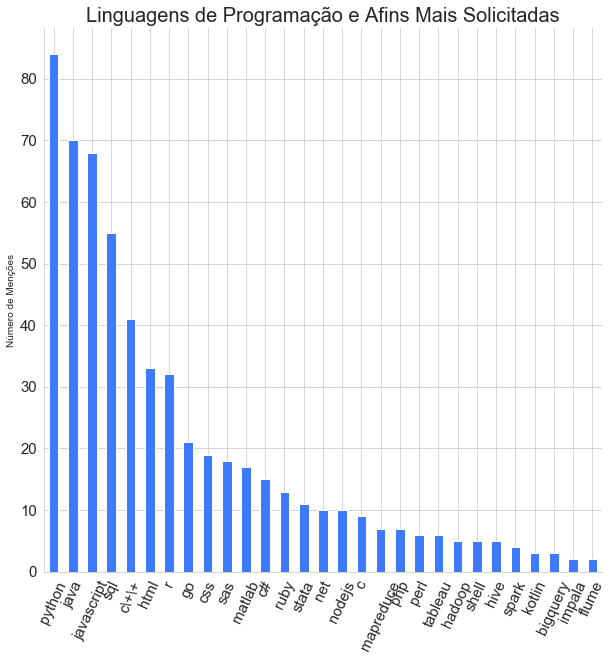

In [73]:
plt.figure(figsize=(10,10))
df_prog.sum().sort_values(ascending=False).plot('bar',  color='xkcd:lightish blue')
plt.title('Linguagens de Programação e Afins Mais Solicitadas', fontsize=20)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Número de Menções')
plt.yticks(fontsize=15);
plt.xticks(fontsize=15, rotation=65);

In [74]:
df_prog.columns

Index(['Minimum Qualifications', 'Title', 'Category', 'javascript', 'python',
       'java', 'php', 'c', 'c#', 'c\+\+', 'shell', 'ruby', 'sql', 'go', 'r',
       'perl', 'kotlin', 'matlab', 'stata', 'sas', 'html', 'css', 'nodejs',
       'net', 'tableau', 'mapreduce', 'hadoop', 'spark', 'flume', 'hive',
       'impala', 'bigquery'],
      dtype='object')

### Vou verificar abaixo alguns pontos de preocupação meus: a captura de ocorrências da linguagem C e a distinção entre Java e Javascript, tendo em vista que Java faz parte da palavra "Java-script".

In [75]:
df_prog[df_prog['c']==1]

Minimum Qualifications  \
17   BA/BS degree in Computer Science or related te...   
65   Master's degree in Computer Science or Electri...   
77   BA/BS degree or equivalent practical experienc...   
108  Master's degree in Computer Science or Electri...   
131  BS degree in Computer Science or related techn...   
147  3 years of experience with device hardware or ...   
166  BA/BS degree in Computer Science or related te...   
198  BS degree in Computer Science or related techn...   
281  BA/BS degree in computer science, related tech...   

                                                 Title  \
17   Software Engineering Manager, Cloud Storage, S...   
65             Software Engineer, Performance Modeling   
77                         Front End Software Engineer   
108             Software Engineer, Virtual Prototyping   
131    Software Engineer, Site Reliability Engineering   
147  Partner Engineer, Google Assistant, Google Tec...   
166                        Software Engineer (English)   
198     Systems Engineer, Site Reliability Engineering   
281                   Software Engineer, Accessibility   

                     Category  javascript  python  java  php  c  c#  c\+\+  \
17       Software Engineering           0       1     1    0  1   0      1   
65       Software Engineering           0       0     0    0  1   0      1   
77       Software Engineering           0       0     1    0  1   0      1   
108      Software Engineering           0       0     0    0  1   0      0   
131  Technical Infrastructure           0       1     1    0  1   0      1   
147       Technical Solutions           0       0     0    0  1   0      1   
166      Software Engineering           1       1     1    0  1   1      1   
198  Technical Infrastructure           0       1     1    0  1   0      1   
281      Software Engineering           0       1     1    0  1   0      1   

     ...  nodejs  net  tableau  mapreduce  hadoop  spark  flume  hive  impala  \
17   ...       0    0        0          0       0      0      0     0       0   
65   ...       0    0        0          0       0      0      0     0       0   
77   ...       0    0        0          0       0      0      0     0       0   
108  ...       0    0        0          0       0      0      0     0       0   
131  ...       0    0        0          0       0      0      0     0       0   
147  ...       0    0        0          0       0      0      0     0       0   
166  ...       0    0        0          0       0      0      0     0       0   
198  ...       0    0        0          0       0      0      0     0       0   
281  ...       0    0        0          0       0      0      0     0       0   

     bigquery  
17          0  
65          0  
77          0  
108         0  
131         0  
147         0  
166         0  
198         0  
281         0  

[9 rows x 32 columns]

In [76]:
df_prog.iloc[108]['Minimum Qualifications'] #Apenas verificando a exigência de C.

"Master's degree in Computer Science or Electrical Engineering or equivalent practical experience.\n3 years of working experience\nExperience with algorithms and data structures.\nProgramming experience in C or C++."

In [77]:
df_prog[(df_prog['java']==1)&(df_prog['javascript']==0)].shape[0] #ótimo! Estou resgatando java na ausência de javascript

24

In [78]:
df_prog[(df_prog['java']==0)&(df_prog['javascript']==1)].shape[0] #perfeito! Estou conseguindo distinguir java de javascript

22

In [79]:
df_prog[(df_prog['java']==1)&(df_prog['javascript']==1)] # vou acessar qualquer uma das linhas abaixo para verificar o conteúdo de Minimum Qualifications

Minimum Qualifications  \
9    BA/BS degree in Computer Science, related Soft...   
14   BA/BS degree in a technical or engineering fie...   
31   BA/BS degree in Computer Science or a related ...   
41   BA/BS degree in Computer Science, related Soft...   
45   BA/BS degree in a technical or engineering fie...   
47   BA/BS degree or equivalent practical experienc...   
48   BA/BS degree in Computer Science, related Soft...   
53   BA/BS degree in Computer Science or related so...   
55   BS degree in a technical or engineering field ...   
69   BA/BS degree in Computer Science or a related ...   
75   BA/BS degree or equivalent practical experienc...   
76   BA/BS degree in Computer Science or a related ...   
88   BA/BS degree or equivalent practical experienc...   
104  BA/BS degree in Computer Science or a related ...   
115  BA/BS degree in a technical or engineering fie...   
122  BA/BS degree in Computer Science or a related ...   
126  BA/BS degree or equivalent practical experienc...   
145  BA/BS degree or equivalent practical experienc...   
149  BS degree in Computer Science, or a related te...   
165  BA/BS degree in Computer Science or a related ...   
166  BA/BS degree in Computer Science or related te...   
174  BA/BS degree or equivalent practical experienc...   
184  BA/BS degree in Computer Science or a related ...   
186  BA/BS degree in Computer Science or a related ...   
194  BA/BS degree or equivalent practical experienc...   
199  BS degree in Computer Science, Engineering, Ma...   
205  BS degree in a technical or engineering field ...   
213  BS degree in Computer Science, similar technic...   
214  BS degree in a technical or engineering field ...   
215  BA/BS degree or equivalent practical experienc...   
233  BA/BS degree in Computer Science or a related ...   
235  5 years of experience with systems software de...   
236  BA/BS degree in Computer Science or a related ...   
238  BS degree in a technical or engineering field ...   
247  BS degree in Computer Science or related techn...   
255  BA/BS degree in Computer Science, related fiel...   
259  BA/BS degree in Computer Science or a related ...   
268  BS degree in Computer Science or related techn...   
279  BA/BS degree in Computer Science, related Soft...   
287  BA/BS degree in a technical or engineering fie...   
290  BA/BS degree in Computer Science or a related ...   
291  BA/BS degree in a technical or engineering fie...   
319  BA/BS degree in Computer Science, a related fi...   
434  BA/BS degree in Computer Science, a related fi...   
508  BS degree in a technical or engineering field ...   
531  BA/BS degree in Computer Science, a related fi...   

                                                 Title  \
9    Solutions Architect, Healthcare and Life Scien...   
14   Solution Architect, Google Cloud Platform (Api...   
31   Technical Solutions Consultant, Google Technic...   
41   Solutions Architect, Healthcare and Life Scien...   
45   Solution Architect, Google Cloud Platform (Api...   
47               Technical Writer, University Graduate   
48   Solutions Architect, Healthcare and Life Scien...   
53   Solutions Engineer, Google Cloud Healthcare an...   
55   Strategic Cloud Engineer, Google Cloud Profess...   
69   Technical Account Manager, Google Technical Se...   
75                  Developer Advocate, Cloud Platform   
76   Technical Solutions Consultant, Google Technic...   
88               Technical Writer, University Graduate   
104  Technical Solutions Consultant, Google Technic...   
115  Solution Architect, Google Cloud Platform (Api...   
122  Technical Solutions Consultant, Google Technic...   
126              Technical Writer, University Graduate   
145                            Developer Advocate, Web   
149                        Application Engineer, Legal   
165  Technical Account Manager, Google Technical Se...   
166                        Software Engineer (English)   
174              Technical Wr

In [80]:
df_prog.iloc[9]['Minimum Qualifications'] # De fato existe a dupla menção a Java e Javascript

'BA/BS degree in Computer Science, related Software Engineering field or equivalent practical experience.\nExperience working in a cloud computing environment (infrastructure, storage, platforms and/or data).\nExperience working in a healthcare and/or life science domain, including deploying solutions in healthcare and/or life sciences related IT infrastructure.\nExperience in writing software in one or more languages such as Java, Python, Go, JavaScript, C++, or similar.'

--------------------------------------------------------

### Agora verei um pouco de como as competências em cada linguagem são requeridas em cada campo de atuação:

In [81]:

category_lang = pd.pivot_table(data=df_prog, index=['Category'], aggfunc='sum').T
category_lang

Category    Administrative  Business Strategy  Data Center & Network  \
bigquery                 0                  0                      0   
c                        0                  0                      0   
c#                       0                  0                      0   
c\+\+                    0                  0                      0   
css                      0                  0                      0   
flume                    0                  0                      0   
go                       1                  0                      0   
hadoop                   0                  0                      0   
hive                     0                  0                      0   
html                     0                  0                      0   
impala                   0                  0                      0   
java                     3                  0                      0   
javascript               0                  0                      0   
kotlin                   0                  0                      0   
mapreduce                0                  0                      0   
matlab                   0                 11                      0   
net                      0                  0                      0   
nodejs                   0                  0                      0   
perl                     0                  0                      0   
php                      0                  0                      0   
python                   3                  2                      0   
r                        0                 11                      0   
ruby                     0                  0                      0   
sas                      0                  9                      0   
shell                    0                  0                      0   
spark                    0                  0                      0   
sql                      2                 13                      0   
stata                    0                  9                      0   
tableau                  0                  0                      0   

Category    Developer Relations  Finance  Hardware Engineering  \
bigquery                      0        1                     0   
c                             0        0                     0   
c#                            1        0                     0   
c\+\+                         0        0                     0   
css                           0        0                     0   
flume                         0        0                     0   
go                            1        0                     0   
hadoop                        0        1                     0   
hive                          0        1                     0   
html                          0        0                     0   
impala                        0        0                     0   
java                          5        0                     0   
javascript                    2        0                     0   
kotlin                        3        0                     0   
mapreduce                     0        0                     0   
matlab                        0        1                     0   
net                           0        0                     0   
nodejs                        0        0                     0   
perl                          0        0                     1   
php                           1        0                     0   
python                        2        1                     1   
r                             0        1                     0   
ruby                          1        0                     0   
sas                           0        0                     0   
shell                         0        0                     1   
spark                         0        0                     0   
sql                           0        3                 

In [82]:
df_prog[df_prog['python']==1]

Minimum Qualifications  \
2     Bachelor’s degree in Business, Economics, Stat...   
9     BA/BS degree in Computer Science, related Soft...   
13    BA/BS degree in a technical or quantitative/bu...   
14    BA/BS degree in a technical or engineering fie...   
17    BA/BS degree in Computer Science or related te...   
20    PhD in Statistics or Econometrics or a related...   
21    BA/BS degree in Computer Science or other rela...   
23    BA/BS degree in a technical or quantitative/bu...   
31    BA/BS degree in Computer Science or a related ...   
41    BA/BS degree in Computer Science, related Soft...   
45    BA/BS degree in a technical or engineering fie...   
47    BA/BS degree or equivalent practical experienc...   
48    BA/BS degree in Computer Science, related Soft...   
53    BA/BS degree in Computer Science or related so...   
55    BS degree in a technical or engineering field ...   
63    Bachelor's degree in Computer Science, Mathema...   
69    BA/BS degree in Computer Science or a related ...   
75    BA/BS degree or equivalent practical experienc...   
76    BA/BS degree in Computer Science or a related ...   
78    BA/BS degree in Computer Science, Mathematics ...   
84    BA/BS in Computer Science or Robotics, or equi...   
88    BA/BS degree or equivalent practical experienc...   
104   BA/BS degree in Computer Science or a related ...   
111   Experience with management, security and optim...   
115   BA/BS degree in a technical or engineering fie...   
122   BA/BS degree in Computer Science or a related ...   
126   BA/BS degree or equivalent practical experienc...   
127   BS degree in Computer Science or related techn...   
131   BS degree in Computer Science or related techn...   
145   BA/BS degree or equivalent practical experienc...   
...                                                 ...   
268   BS degree in Computer Science or related techn...   
276   BA/BS degree in Computer Science, Mathematics ...   
278   Bachelor's degree in Computer Science, Mathema...   
279   BA/BS degree in Computer Science, related Soft...   
281   BA/BS degree in computer science, related tech...   
287   BA/BS degree in a technical or engineering fie...   
290   BA/BS degree in Computer Science or a related ...   
291   BA/BS degree in a technical or engineering fie...   
308   BA/BS degree in a technical or quantitative/bu...   
316   PhD in Statistics or Econometrics or a related...   
323   BA/BS degree in a technical or quantitative/bu...   
373   BA/BS degree in Statistics, Applied Mathematic...   
376   BA/BS degree in Statistics, Applied Mathematic...   
438   BS degree in Computer Science, Applied Mathema...   
508   BS degree in a technical or engineering field ...   
578   Bachelor's degree in Computer Science, Statist...   
650   BA/BS degree in Statistics, Applied Mathematic...   
765   BA/BS degree in Engineering, Computer Science,...   
795   BA/BS degree in Computer Science, Human-Comput...   
842   BA/BS degree in Computer Science, Human-Comput...   
847   Master’s degree/PhD in computational social sc...   
860   BA/BS degree in Computer Science, Human-Comput...   
909   MS degree in a quantitative discipline (e.g., ...   
933   MS degree in a quantitative discipline (e.g., ...   
985   BA/BS degree in Computer Science, related tech...   
1128  BA/BS degree in Economics, Statistics, Finance...   
1177  Bachelor's degree in Engineering, Computer Sci...   
1186  BA/BS degree or equivalent practical experienc...   
1199  BA/BS degree in Computer Science or a related ...   
1203  BA/BS degree in Computer Science or a related ...   

                                                  Title  \
2     Data Analyst, Product and Tools Operations, Go...   
9     Solutions Architect, Healthcare and Life Scien...   
13                    Survey Lead, Google Cloud Support   
14    Solution Architect, Google Cloud Platform (Api...   
17    Software Engineering Manager, Cloud Storage, S...   
20                  

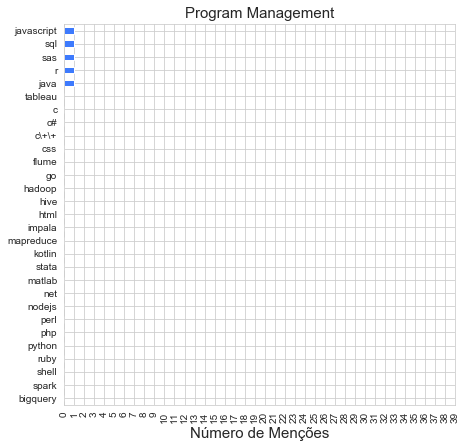

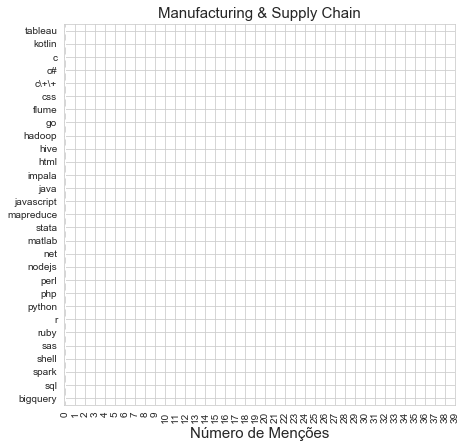

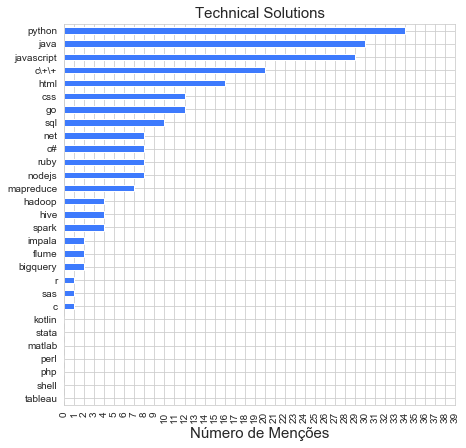

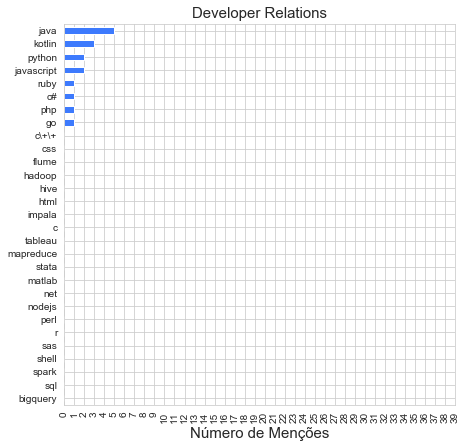

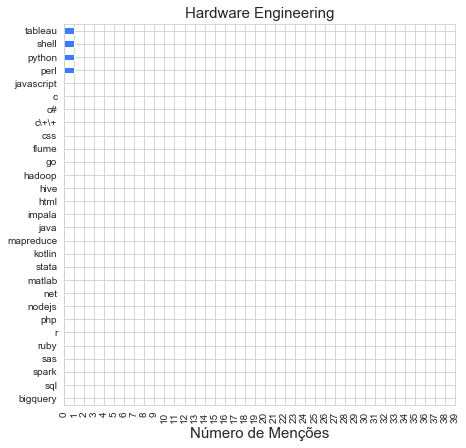

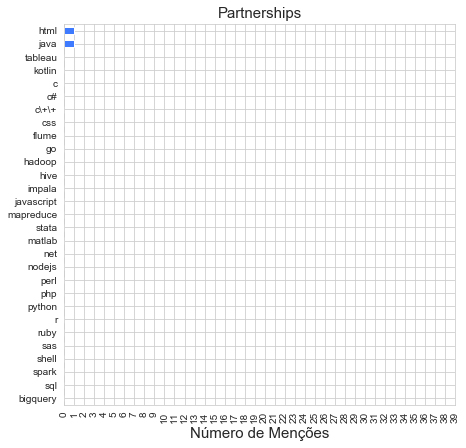

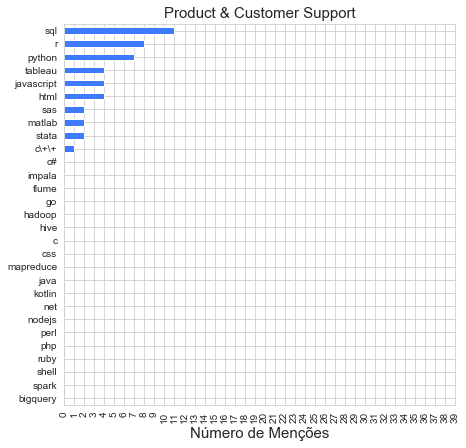

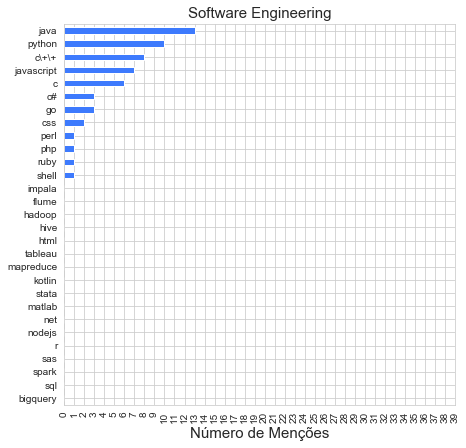

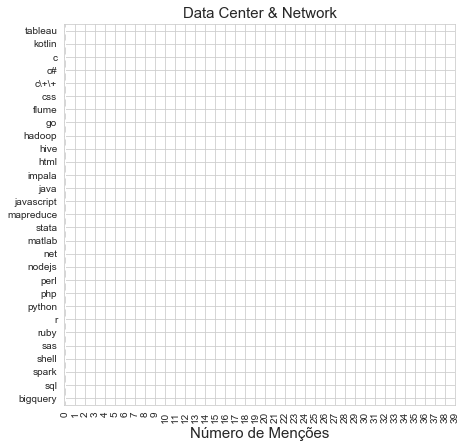

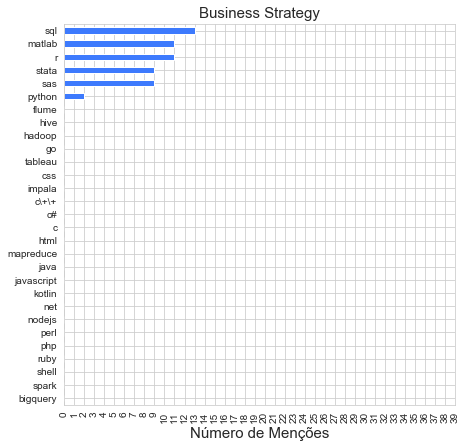

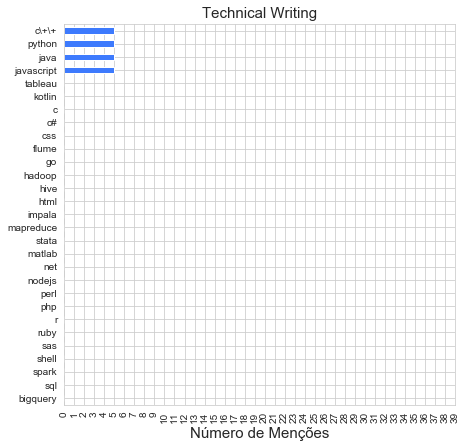

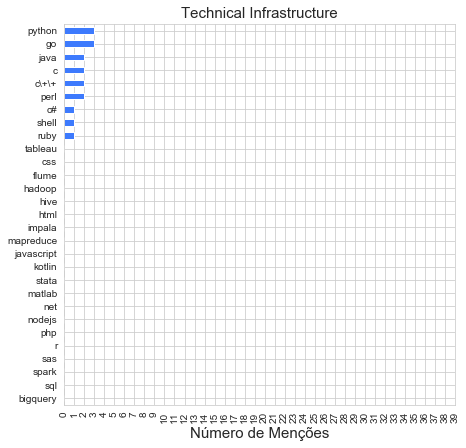

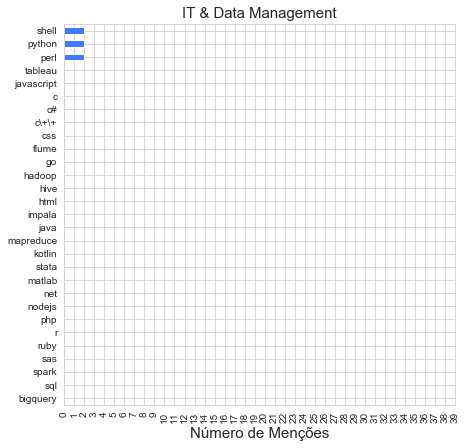

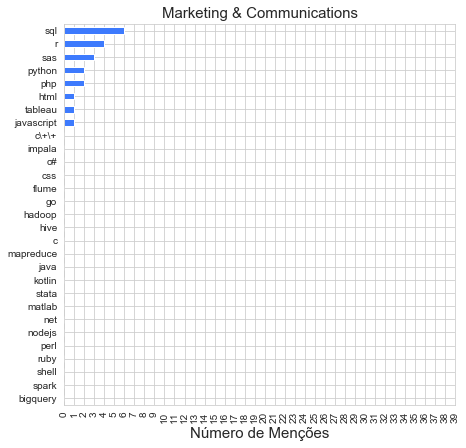

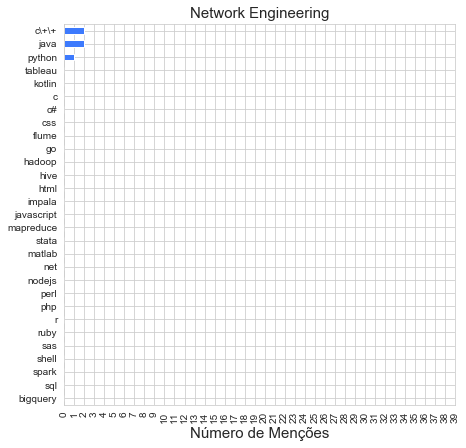

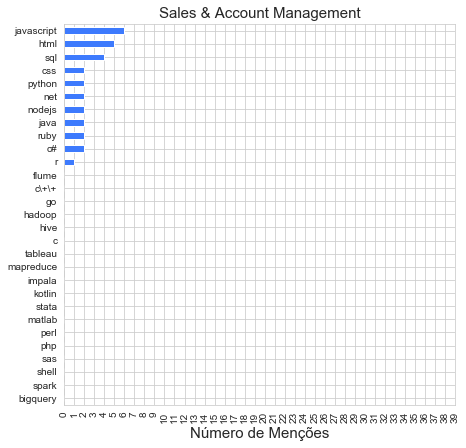

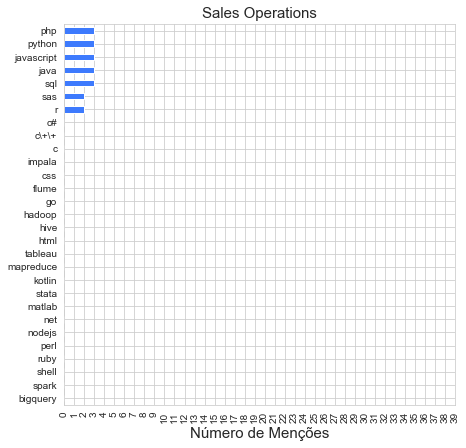

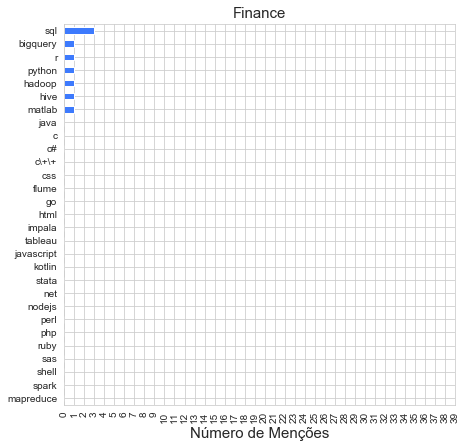

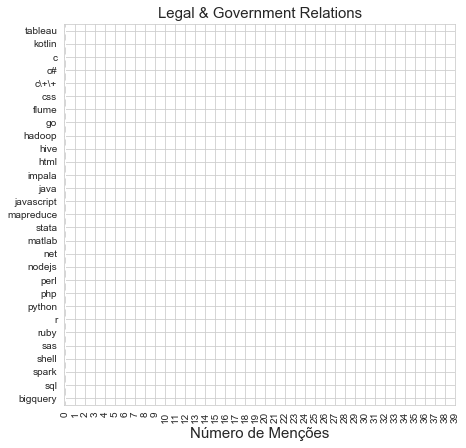

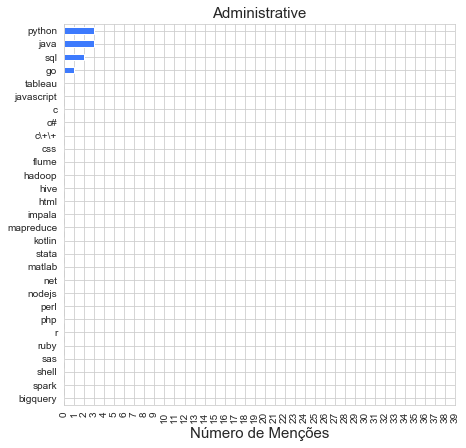

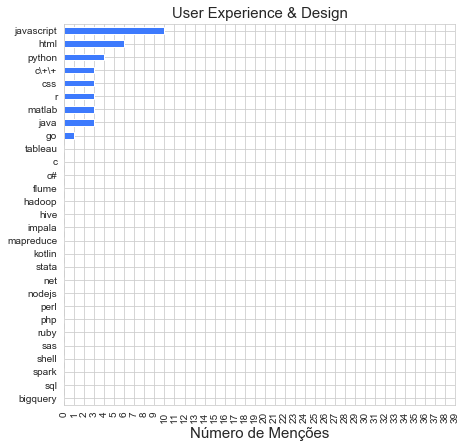

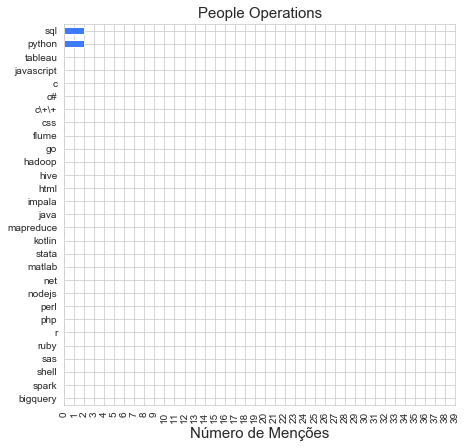

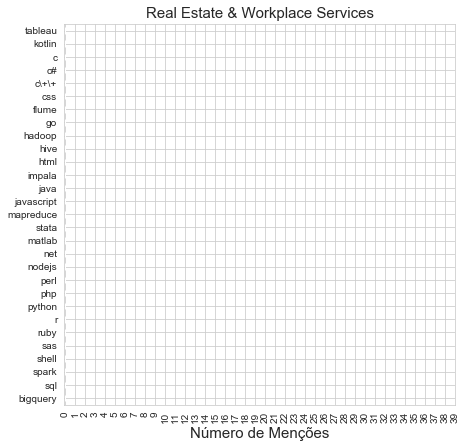

In [83]:
# Neste quero investigar a distribuição de linguagens de programação por setor. 
# Manterei a mesma escala para todos os gráficos para ter visão de escala.

for cat in list(df_prog.Category.unique()):
    plt.figure(figsize=(7,7))
    plt.title(cat, fontsize=15)
    category_lang[cat].sort_values().plot(kind='barh', color='xkcd:lightish blue')
    plt.xticks([n for n in range(40)])
    plt.xticks(rotation=90)
    plt.xlabel('Número de Menções', fontsize=15)
    plt.show()

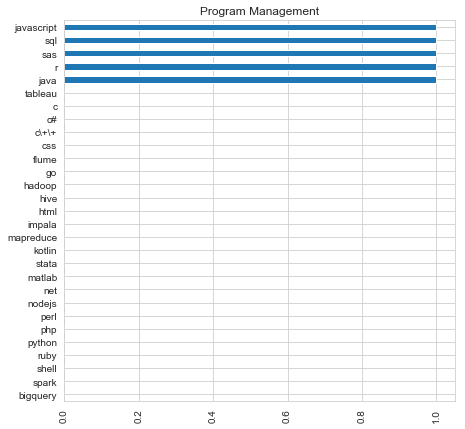

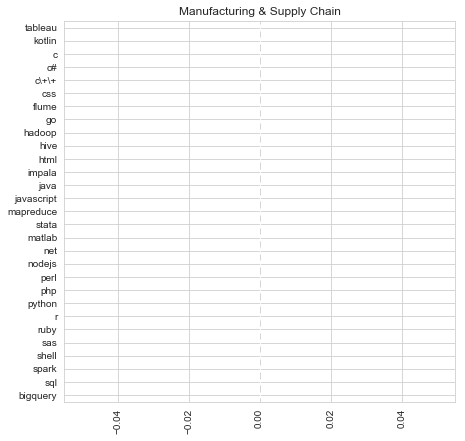

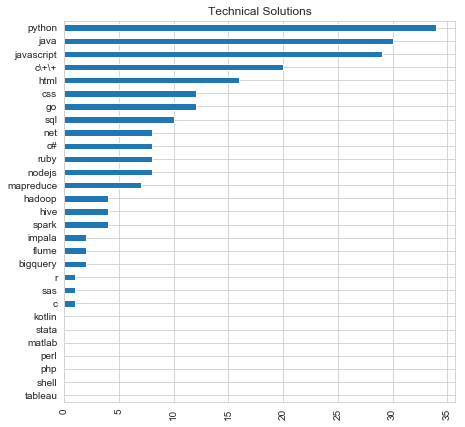

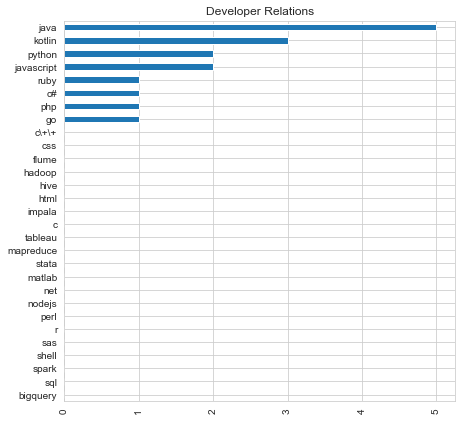

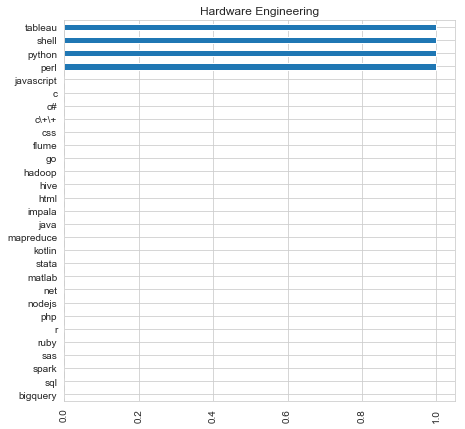

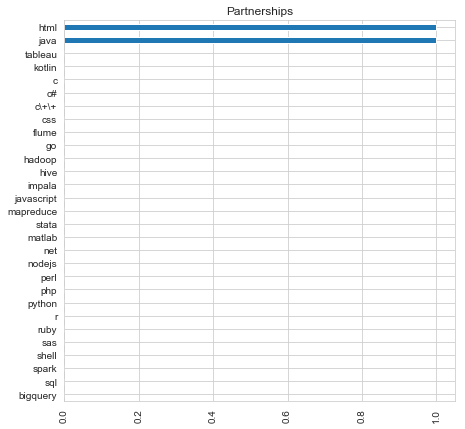

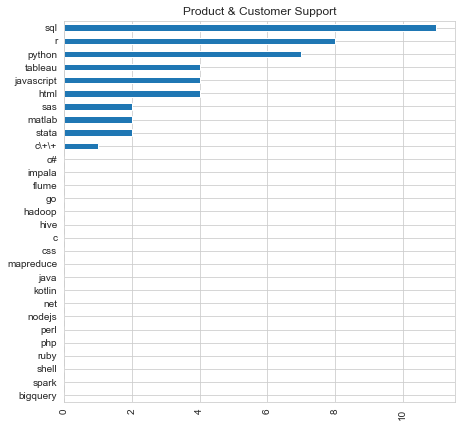

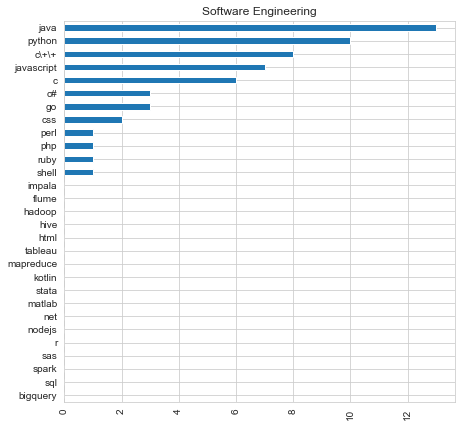

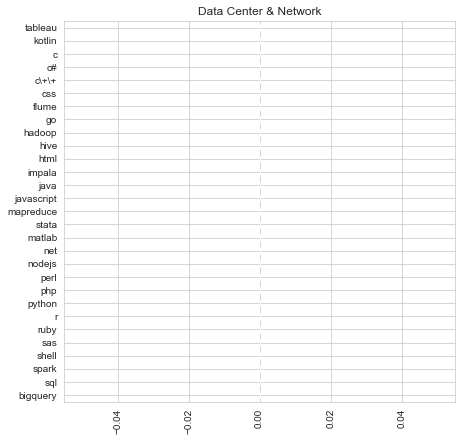

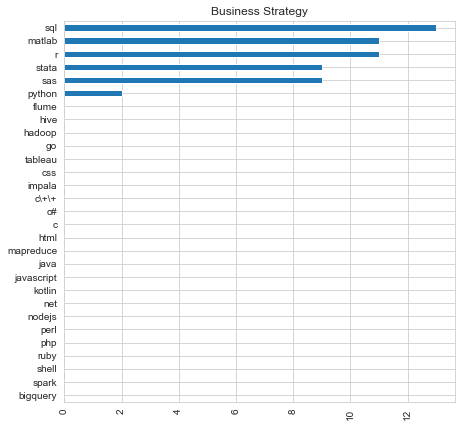

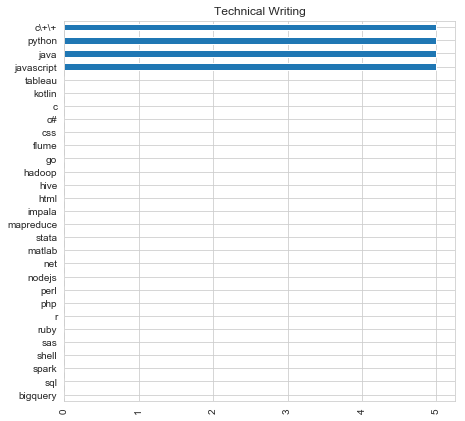

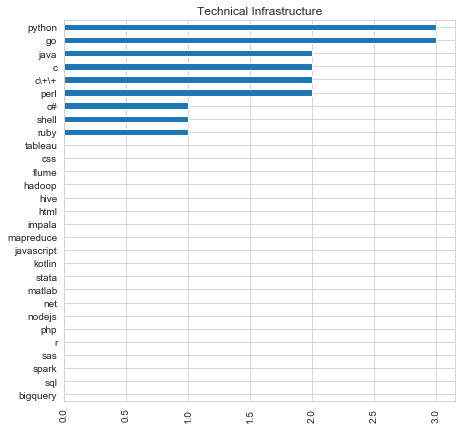

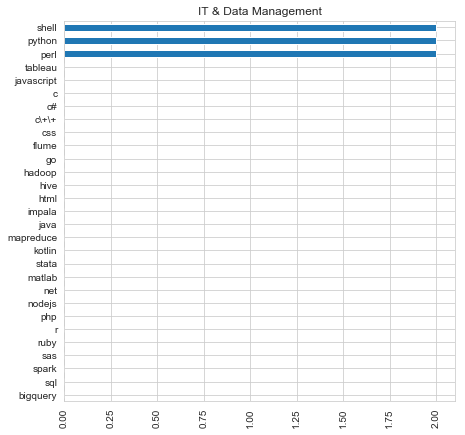

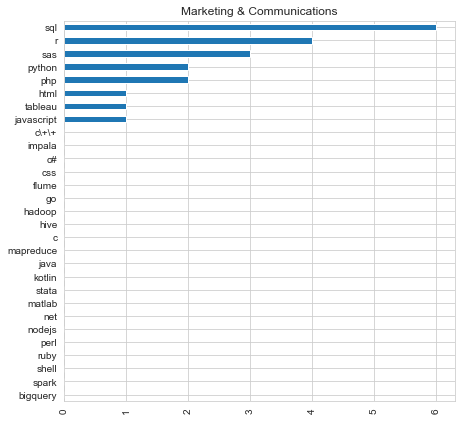

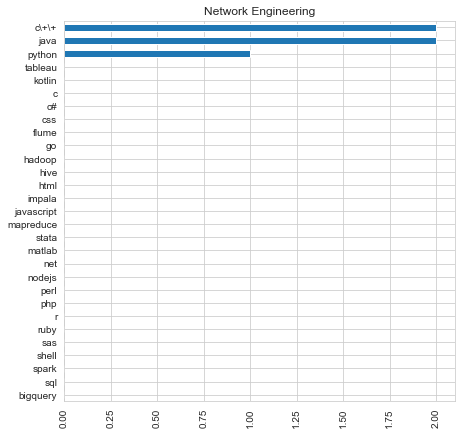

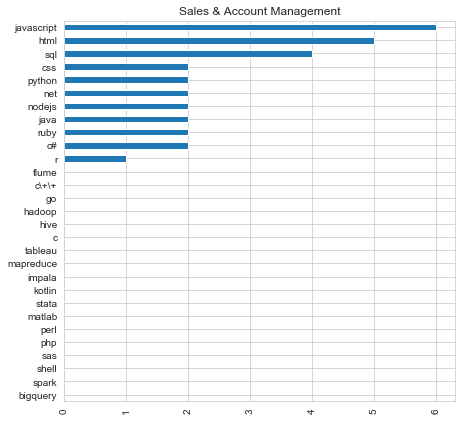

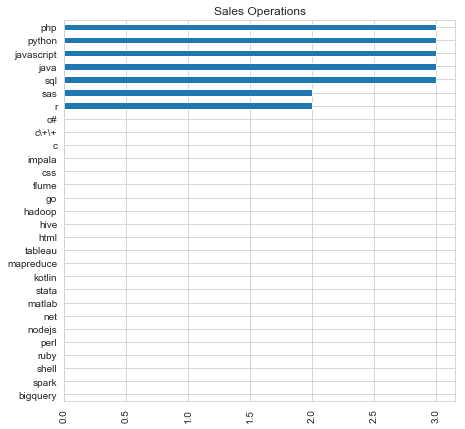

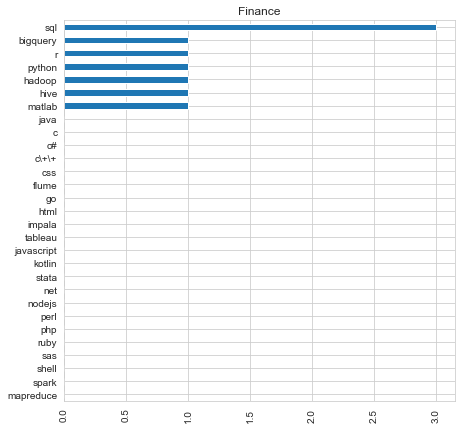

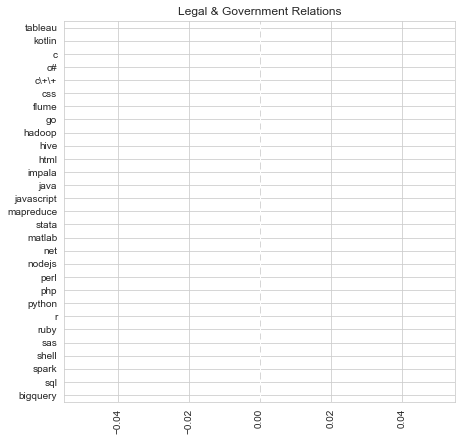

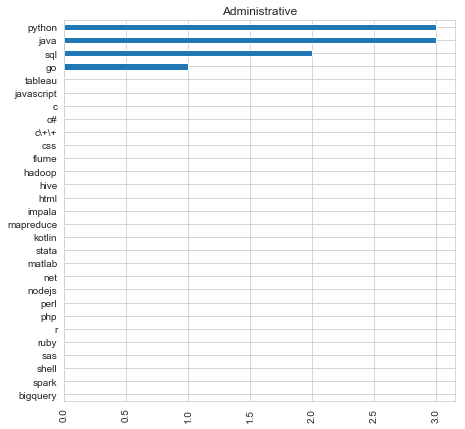

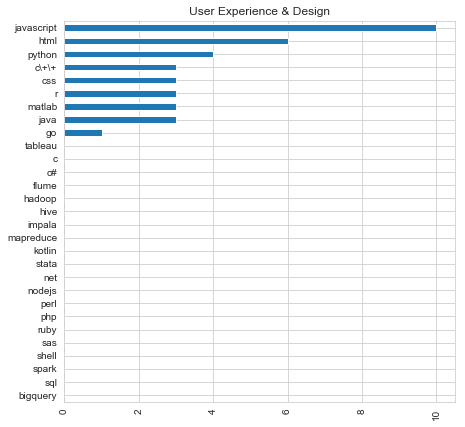

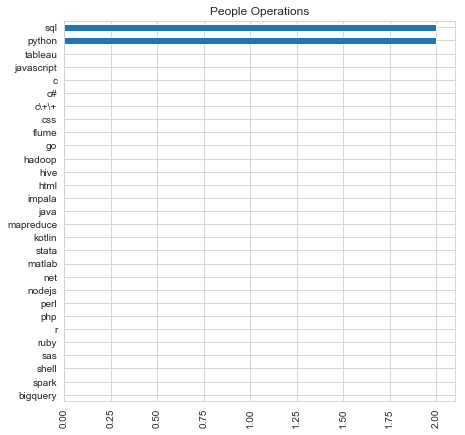

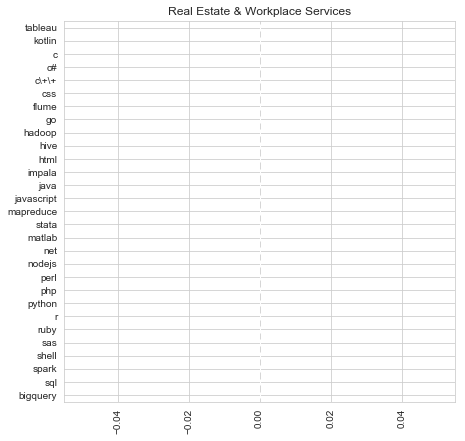

In [84]:
# neste darei preferência para ajustar à melhor escala para cada caso:

# Obs: sei que não é bonito um gráfico que não mostra nada, como no caso de 'Real State & Workplace Services', mas
# vou mantê-lo apenas como um lembrete de que a categoria existe, mas não exige linguagens de programação.
for cat in list(df_prog.Category.unique()):
    plt.figure(figsize=(7,7))
    plt.title(cat)
    category_lang[cat].sort_values().plot(kind='barh')
    plt.xticks(rotation=90)
    plt.show()

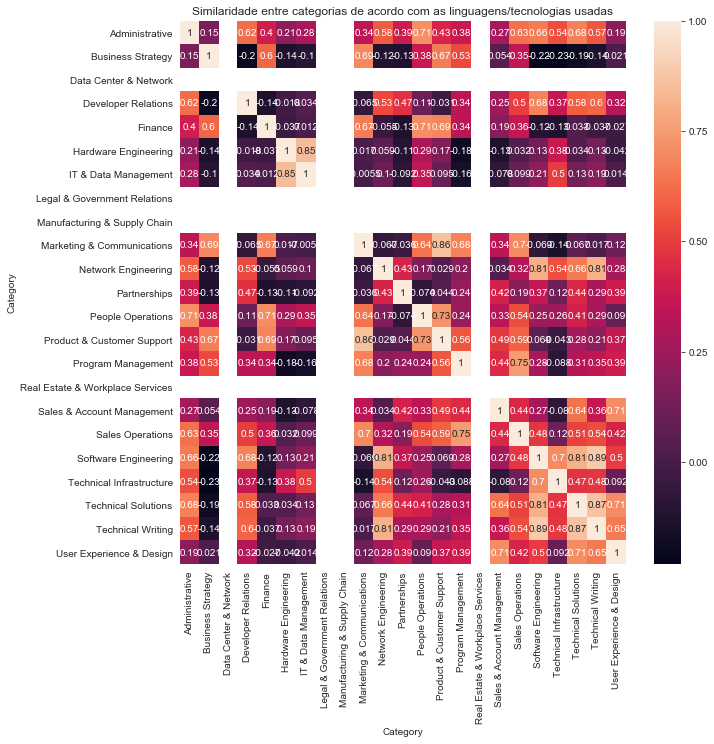

In [85]:
plt.figure(figsize=(10,10))
plt.title('Similaridade entre categorias de acordo com as linguagens/tecnologias usadas')
sns.heatmap(category_lang.corr(), annot=True);

In [86]:
# A primeira tentativa de abordar este problema de forma generalista será a partir de um bag_of_words, 
# para verificar a frequência com que cada palavra aparece.


In [87]:
#from scipy.spatial.distance import pdist, squareform
similar = pd.DataFrame(1/(1+squareform(pdist(category_lang.T, 'euclidean'))), 
                       index=category_lang.columns, 
                       columns=category_lang.columns)


similar

# Aqui estamos calculando a similaridade entre as categorias considerando distância euclidiana temdo como base 
# as skills relacionadas a programação. No futuro será interessante enriquecer o dataset com outras soft e hard skills
# relacionadas a todas as áreas. E estou fazendo isso com relação a Categorias, mas poderia ter feiro com relação ao 
#título das vagas.

Category                          Administrative  Business Strategy  \
Category                                                              
Administrative                          1.000000           0.041405   
Business Strategy                       0.041405           1.000000   
Data Center & Network                   0.172538           0.039967   
Developer Relations                     0.166667           0.038761   
Finance                                 0.182744           0.044273   
Hardware Engineering                    0.179129           0.039967   
IT & Data Management                    0.172538           0.039834   
Legal & Government Relations            0.172538           0.039967   
Manufacturing & Supply Chain            0.172538           0.039967   
Marketing & Communications              0.115192           0.051229   
Network Engineering                     0.210897           0.039802   
Partnerships                            0.186605           0.039900   
People Operations                       0.231662           0.041818   
Product & Customer Support              0.061608           0.057772   
Program Management                      0.190744           0.042166   
Real Estate & Workplace Services        0.172538           0.039967   
Sales & Account Management              0.095841           0.040932   
Sales Operations                        0.158945           0.044548   
Software Engineering                    0.052709           0.030940   
Technical Infrastructure                0.169521           0.039161   
Technical Solutions                     0.015792           0.014769   
Technical Writing                       0.111891           0.037549   
User Experience & Design                0.069910           0.038403   

Category                          Data Center & Network  Developer Relations  \
Category                                                                       
Administrative                                 0.172538             0.166667   
Business Strategy                              0.039967             0.038761   
Data Center & Network                          1.000000             0.128496   
Developer Relations                            0.128496             1.000000   
Finance                                        0.205213             0.116961   
Hardware Engineering                           0.333333             0.128496   
IT & Data Management                           0.224009             0.123899   
Legal & Government Relations                   1.000000             0.128496   
Manufacturing & Supply Chain                   1.000000             0.128496   
Marketing & Communications                     0.105426             0.090094   
Network Engineering                            0.250000             0.152259   
Partnerships                                   0.414214             0.139579   
People Operations                              0.261204             0.128496   
Product & Customer Support                     0.055019             0.054844   
Program Management                             0.309017             0.141188   
Real Estate & Workplace Services               1.000000             0.128496   
Sales & Account Management                     0.088530             0.094414   
Sales Operations                               0.120771             0.138026   
Software Engineering                           0.045308             0.056775   
Technical Infrastructure                       0.141188             0.135078   
Technical Solutions                            0.015005             0.016074   
Technical Writing                              0.090909             0.117878   
User Experience & Design                       0.066352             0.074129   

Category                           Finance  Hardware Engineering  \
Category                                                           
Administrative                    0.182744              0.179129   
Business Strategy  

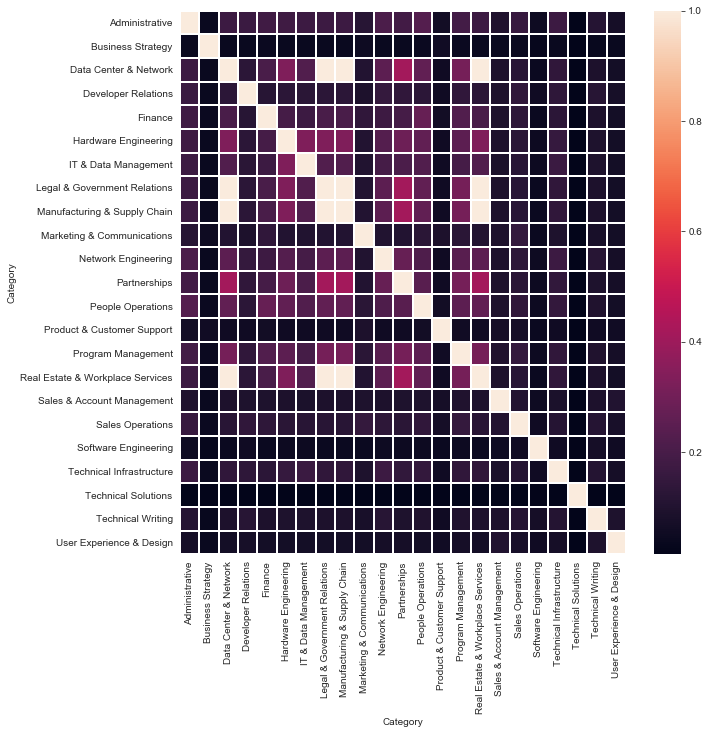

In [88]:
plt.figure(figsize=(10,10))
sns.heatmap(data=similar, linewidths=1);

------------------------------------------------

## Este caminho parece ser promissor! E se eu generalizar a busca por linguagens de programação e estender para outras hard skills, soft skills e experiências?



--------------------------------------------

# Estudo: Hard Skills e Soft Skills para Sistema de Recomendação

In [89]:
df_skills = df[['Minimum Qualifications', 'Title', 'Category']].copy(deep=True)

Farei uma pequena análise de frequencia de palavras para as diversas categorias:

In [90]:
df['Category'].unique()

array(['Program Management', 'Manufacturing & Supply Chain',
       'Technical Solutions', 'Developer Relations',
       'Hardware Engineering', 'Partnerships',
       'Product & Customer Support', 'Software Engineering',
       'Data Center & Network', 'Business Strategy', 'Technical Writing',
       'Technical Infrastructure', 'IT & Data Management',
       'Marketing & Communications', 'Network Engineering',
       'Sales & Account Management', 'Sales Operations', 'Finance',
       'Legal & Government Relations', 'Administrative',
       'User Experience & Design', 'People Operations',
       'Real Estate & Workplace Services'], dtype=object)

In [91]:
#Farei um Bag of Words agora

# Esta é uma função para tirar a pontuação do texto, facilitando minha análise (espero). 
def removeStuff(string):
    import re # pacote para executar regex
    pattern = [
    r"[.%!+;={}():/\[\]\@\?\"]",   #remove pontuação
    ]  
    for x in pattern:
        string = re.sub(x, '', string)
    return string

# Agora verificarei as palavras mais frequentes:

def freq_palavras(df,coluna_investigada='Minimum Qualifications',categoria='Administrative'):
    
    corpus = []

    corpus = list(df[df['Category']==categoria][coluna_investigada].dropna().values) 

    corpus = [removeStuff(string) for string in corpus] #Estou retirando a pontuação

    list_stop_words = list(stop_words.ENGLISH_STOP_WORDS) #pegando as Stop_Words mais comuns em inglês para serem retiradas

    corpus = [text.split() for text in corpus] #separando as palavras de cada string.

    corpus = [word for text in corpus for word in text if word not in list_stop_words] #reorganizando a lista e já retirando as stop_words

    vectorizer = CountVectorizer()

    freq = vectorizer.fit_transform(corpus)

    FreqPalavras = pd.DataFrame(freq.toarray(), columns=vectorizer.get_feature_names())
    
    return FreqPalavras

In [92]:
FreqPalavras = freq_palavras(df,coluna_investigada='Minimum Qualifications',categoria='Real Estate & Workplace Services')

In [93]:
FreqPalavras.sum().sort_values(ascending=False)

experience         66
equivalent         27
practical          25
degree             24
years              22
babs               22
management         20
ability            12
managing           12
speak              10
english            10
write              10
10                 10
fluently            9
idiomatically       9
security            9
corporate           8
working             8
real                8
estate              8
project             7
field               7
related             6
chinese             6
guard               6
force               6
contracted          5
mandarin            5
development         5
operations          5
                   ..
sustainable         1
25                  1
20                  1
conducting          1
functional          1
consulting          1
vendor              1
stakeholders        1
infrastructure      1
interfacing         1
international       1
executives          1
executive           1
internationally     1
lease     

In [94]:
FreqPalavras = freq_palavras(df,coluna_investigada='Minimum Qualifications',categoria='Finance')
FreqPalavras.sum().sort_values(ascending=False)

experience            192
2018                   96
equivalent             79
babs                   79
years                  67
degree                 65
practical              65
be                     61
work                   55
june                   53
december               53
accounting             50
program                45
relevant               44
states                 42
united                 42
enrolled               40
date                   40
currently              37
major                  37
graduation             37
university             37
expected               37
2019                   36
finance                28
may                    24
complete               24
year                   24
able                   24
ability                22
                     ... 
debt                    1
personnel               1
database                1
perspective             1
individual              1
privacy                 1
currency                1
cross       

In [95]:
FreqPalavras = freq_palavras(df,coluna_investigada='Minimum Qualifications',categoria='Manufacturing & Supply Chain')
FreqPalavras.sum().sort_values(ascending=False)

experience                 57
engineering                24
equivalent                 21
years                      19
chain                      17
management                 17
supply                     16
practical                  14
related                    12
cost                       10
babs                        9
industry                    8
degree                      8
field                       7
product                     7
commodity                   6
procurement                 6
technology                  6
business                    6
mechanical                  6
andor                       6
consumer                    6
manufacturing               5
operations                  5
electrical                  5
manufacturers               4
process                     4
models                      4
development                 4
hardware                    4
                           ..
printed                     1
processmanufacturing        1
kitting   

In [96]:
FreqPalavras = freq_palavras(df,coluna_investigada='Minimum Qualifications',categoria='Developer Relations')
FreqPalavras.sum().sort_values(ascending=False)

experience            18
working                7
babs                   5
degree                 5
equivalent             5
following              5
practical              5
java                   5
javascript             5
directly               4
partners               4
languagesplatforms     3
android                3
computer               3
ios                    3
kotlin                 3
programming            3
science                3
analytics              2
andor                  2
languages              2
go                     2
python                 2
data                   2
development            1
unixlinux              1
software               1
building               1
cc                     1
coding                 1
servers                1
net                    1
ruby                   1
engineering            1
machine                1
including              1
pipelines              1
php                    1
objective              1
windows                1


In [97]:
FreqPalavras = freq_palavras(df,coluna_investigada='Minimum Qualifications',categoria='IT & Data Management')
FreqPalavras.sum().sort_values(ascending=False)


experience                  22
projects                     6
languages                    6
following                    5
practical                    5
linux                        5
scripting                    5
equivalent                   5
hyperion                     4
management                   4
linguisticscomputational     3
multiple                     3
multi                        3
morphology                   3
environment                  3
finnish                      3
linguistics                  3
idiomatically                3
fluently                     3
write                        3
developing                   3
internationally              3
discourse                    3
dutch                        3
english                      3
norwegian                    3
ability                      3
partners                     3
completion                   3
swedish                      3
                            ..
data                         2
building

### Infelizmente esta análise não parece estar me levando muito longe.
Talvez eu deva começar com um palpite mais focalizado. Buscarei referências sobre o que buscar.
E começarei com esta referência sobre soft skills e hard skills: https://www.jobscan.co/blog/soft-skills-vs-hard-skills/

Também pincelei alguns dos termos usados em cada categoria para refinar meu trabalho inicial.

In [98]:
# Relembrando que tínhamos feito:
# df_skills = df[['Minimum Qualifications', 'Title', 'Category']].copy(deep=True)

In [99]:
popular_skills = list(set(['JavaScript','Python', 'Java', 'PHP', 'C', 'C#', 'C\+\+', 'TypeScript', 'Shell', 'Ruby', 
                'SQL', 'Swift', 'Go', 'R Programming Language', 'R', 'Perl', 'Kotlin', 'Rust','ios','android',
        'Scheme', 'Elixir', 'Haskell', 'Scala', 'matlab', 'Stata', 'SAS', 'HTML', 'CSS', 
        'NodeJS', 'NET', 'Tableau',  'MapReduce', 'Hadoop', 'Spark', 'Flume', 'Hive', 'Impala', 'Spark', 'BigQuery',
        'Data mining', 'Analytics', 'Data analysis', 'SaaS', 'cloud', 'Coding', 'AI', 'Machine learning', 'SEO',
        'SEM', 'Social media','Outreach','Inside sales','Outbound','Inbound','marketing', 'sale','Strategy','Forecasting','CRM',
        'Apache Hadoop', 'Apache Spark', 'Excel','Computer science', 'Data visualization','real state',
        'Mathematics','Bookkeeping','IT','Quickbooks','GAAP','Analytics','Auditing', 'law', 'Legal Procedure','Oral',
        'Cash flow', 'management','Microsoft Office','Risk Analysis','Communication','Leadership', 'Written','write' 
        'Adaptability','Problem-solver','Listening','Team-oriented','Team player','Strong work ethic', 'idiomatically',
        'Decision maker','Strategic thinker','Skilled Collaborator','Time management','Self-motivated','Communication'
        'Multitasker','Conflict resolution','Responsible','Flexible','Organized','Work well under pressure', 'accounting',
        'Competitive','Entrepreneurial','Integrity','Hands-on','Innovation','Consistent','Creative','Client Service'
        'Energetic','Enthusiastic','Driven','Attention to detail', 'Legal Research','hardware driver','firmware development',
        'codec','video codecs','vp8', 'vp9', 'h.264', 'hevc','hardware driver','firmware','development','software design',
        'problem solving','debugging','supply chain','consumer hardware','supply','demand','planning','process',
        'manufacturing','sma','backend','assembly','test areas', 'process failure mode effects analysis', 'pfmea','gage',
        'r&r','process validation','process capability','robust process designs','production equipment','fixturing qualification','maintenance',
        'mobile devices', 'mobile operator', 'start-ups', 'product experience' 'partner management', 'speak','write','english','french','fluently','idiomatically',
        'project management', 'ad operations', 'technical account management','apps scripts','sales delivery',
        'agency engagement','advertisers', 'agencies', 'clients','partner management','building relationships','stakeholders',
        'advertising sales', 'marketing', 'consulting','media', 'tv media', 'creative','product integration','campaign attribution',
        'marketo','salesforce','end-to-end', 'marketing campaign planning','websites','google app engine', 'search console','google analytics',
        'ux', 'design','portfolio','mobile applications','research-based curriculum','computer-based instruction','e-learning',
        'people management','ad tech','publisher','sellside','tax','treasury', 'financial instruments','fx','hedging transactions', 'public account','scaling','automation of processes',
        'income trading','investment grade', 'corporate strategies','analytical reports','compliance',
        'electronic payments','fraud management','payments','network operating rules','kyc','aml','data privacy','security regulations',
        'ndf', 'commodities','options','financial modeling','value drivers',
        'cpa','ca','qualified lawyer','admitted to practice','privacy issues','legal experience','legal challenges',
        'licensed attorney','law firm']))

#detalhe: esta lista será usada para encontrar padrões com regex. E C++ apresentará problemas com metacaracteres, motivo pelo 
# qual estou já inserindo a '\' para o '+' ser entendido apenas como um caractere e não como um metacaracter.

popular_skills = [x.lower() for x in popular_skills]
popular_skills

['scala',
 'campaign attribution',
 'saas',
 'analytics',
 'ndf',
 'english',
 'bigquery',
 'start-ups',
 'product integration',
 'scaling',
 'financial instruments',
 'enthusiastic',
 'swift',
 'mobile operator',
 'income trading',
 'fluently',
 'ux',
 'maintenance',
 'communicationmultitasker',
 'pfmea',
 'speak',
 'legal research',
 'listening',
 'websites',
 'analytical reports',
 'creative',
 'firmware',
 'compliance',
 'public account',
 'software design',
 'media',
 'php',
 'manufacturing',
 'end-to-end',
 'strategy',
 'typescript',
 'impala',
 'robust process designs',
 'ad operations',
 'e-learning',
 'c',
 'python',
 'spark',
 'portfolio',
 'integrity',
 'tv media',
 'mapreduce',
 'hands-on',
 'organized',
 'ios',
 'debugging',
 'c\\+\\+',
 'vp9',
 'work well under pressure',
 'clients',
 'marketo',
 'marketing campaign planning',
 'sales delivery',
 'apps scripts',
 'consulting',
 'cloud',
 'client serviceenergetic',
 'bookkeeping',
 'process validation',
 'vp8',
 'advertise

In [100]:
for skill in popular_skills:
    
    pattern = "[\s]\(?("+skill+")[.,;\/\)]?[\s]"

    df_skills[skill] = df_skills['Minimum Qualifications'].apply(lambda x: 1 if re.search(pattern, str(x).lower()) else 0)

In [101]:
df_skills

Minimum Qualifications  \
0     BA/BS degree or equivalent practical experienc...   
1     BS degree in an Engineering discipline or equi...   
2     Bachelor’s degree in Business, Economics, Stat...   
3     BA/BS degree in Computer Science or equivalent...   
4     BA/BS degree or equivalent practical experienc...   
5     Bachelor's degree or equivalent practical expe...   
6     BS degree in Engineering or equivalent practic...   
7     BA/BS degree or equivalent practical experienc...   
8     BA/BS degree in Engineering, Supply Chain or e...   
9     BA/BS degree in Computer Science, related Soft...   
10    BA/BS degree in Computer Science, Engineering,...   
11    Bachelor's degree or equivalent practical expe...   
12    Bachelor's degree or equivalent practical expe...   
13    BA/BS degree in a technical or quantitative/bu...   
14    BA/BS degree in a technical or engineering fie...   
15                                                  NaN   
16    BA/BS degree in Computer Science or a related ...   
17    BA/BS degree in Computer Science or related te...   
18    BA/BS in Electrical Engineering, Mechanical En...   
19    BS degree in Electrical Engineering, Computer ...   
20    PhD in Statistics or Econometrics or a related...   
21    BA/BS degree in Computer Science or other rela...   
22    BA/BS degree or equivalent practical experienc...   
23    BA/BS degree in a technical or quantitative/bu...   
24    7 years of experience in a Technical Training ...   
25    Bachelor's degree in Computer Science or a rel...   
26    Bachelor's degree in Computer Science, or a re...   
27    5 years of experience in supply chain operatio...   
28    BA/BS degree in Computer Science or a related ...   
29    BA/BS degree in Computer Science or a related ...   
...                                                 ...   
1220  BA/BS degree or equivalent practical experienc...   
1221  BA/BS degree or equivalent professional experi...   
1222  BA/BS degree or equivalent practical experienc...   
1223  BA/BS degree or equivalent practical experienc...   
1224  Bachelor's degree or equivalent practical expe...   
1225  BA/BS or equivalent practical experience.\n5 y...   
1226  Bachelor's degree or equivalent practical expe...   
1227  BA degree in Marketing, Communications, Politi...   
1228  BA/BS degree in Business Management, Marketing...   
1229  BA/BS degree in a related field or equivalent ...   
1230  BA/BS degree or equivalent practical experienc...   
1231  BA/BS degree or equivalent practical experienc...   
1232  BA/BS degree or equivalent practical experienc...   
1233  BA/BS degree in engineering, architecture, rea...   
1234  BA/BS degree or equivalent practical experienc...   
1235  BA/BS degree or equivalent practical experienc...   
1236  BA/BS degree in Hotel Management, Nutrition or...   
1237  BA/BS degree in Hotel Management, Nutrition or...   
1238  Bachelor's degree or equivalent practical expe...   
1239  Bachelor's degree in Finance, Business, Engine...   
1240  BA/BS degree or equivalent practical experienc...   
1241  BA/BS degree in engineering, architecture, rea...   
1242  BA/BS degree or equivalent practical experienc...   
1243  BA/BS degree or equivalent practical experienc...   
1244  BA/BS degree or equivalent practical experienc...   
1245  BA/BS degree or equivalent practical experienc...   
1246  BA/BS degree or equivalent practical experienc...   
1247  BA/BS degree or equivalent practical experienc...   
1248  BA/BS degree or equivalent practical experienc...   
1249  BA/BS degree or equivalent practical experienc...   

                                                  Title  \
0                          Google Cloud Program Manager   
1     Supplier Development Engineer (SDE), Cable/Con...   
2     Data Analyst, Product and Tools Operations, Go...   
3               Developer Advocate, Partner Engineering   
4        Program Manager, Audio Visual (AV) Deployments   
5     Associate Acco

In [102]:
df_skills.sum().sort_values(ascending=False)

management                 285
speak                      281
fluently                   279
english                    279
write                      276
computer science           215
development                126
marketing                  120
consulting                 119
cloud                      117
design                     100
python                      84
java                        70
javascript                  68
media                       57
sql                         55
analytics                   45
accounting                  44
c\+\+                       41
strategy                    41
project management          40
portfolio                   34
html                        33
r                           32
mathematics                 28
advertising sales           27
people management           25
data analysis               25
saas                        25
law                         24
                          ... 
innovation                   0
assembly

In [103]:
# Vou retirar a coluna referente a todas as skills que não tiveram nehum representante:
for skill in popular_skills:
    if df_skills[skill].sum()==0:
        df_skills.drop(columns=[skill], inplace=True)

In [104]:
category_skills = pd.pivot_table(data=df_skills, index=['Category'], aggfunc='sum').T
category_skills

Category                      Administrative  Business Strategy  \
accounting                                 0                  4   
ad operations                              0                  0   
ad tech                                    0                  1   
admitted to practice                       0                  0   
advertisers                                0                  0   
advertising sales                          0                  0   
agencies                                   0                  0   
agency engagement                          0                  0   
aml                                        0                  0   
analytical reports                         0                  0   
analytics                                  0                  2   
android                                    0                  0   
apps scripts                               0                  0   
backend                                    0                  0   
bigquery                                   0                  0   
building relationships                     0                  0   
c                                          0                  0   
c#                                         0                  0   
c\+\+                                      0                  0   
ca                                         0                  0   
campaign attribution                       0                  0   
clients                                    0                  0   
cloud                                      0                  3   
codec                                      0                  0   
coding                                     2                  0   
commodities                                0                  0   
communication                              0                  0   
competitive                                0                  0   
compliance                                 0                  0   
computer science                           2                  6   
...                                      ...                ...   
sas                                        0                  9   
scaling                                    0                  0   
search console                             0                  0   
sem                                        0                  0   
seo                                        0                  0   
shell                                      0                  0   
sma                                        0                  0   
social media                               0                  0   
software design                            0                  0   
spark                                      0                  0   
speak                                      0                 11   
sql                                        2                 13   
stakeholders                               0                  1   
start-ups                                  0                  0   
stata                                      0                  9   
strategy                                   0                 16   
supply                                     0                  0   
supply chain                               0                  0   
tableau                                    0                  0   
tax                                        0                  0   
technical account management               0                  0   
treasury                                   0                  0   
tv media                                   0                  0   
ux                                         0                  1   
video codecs                               0                  0   
vp8                                        0                  0   
vp9                                        0                  0   
websites                                   0   

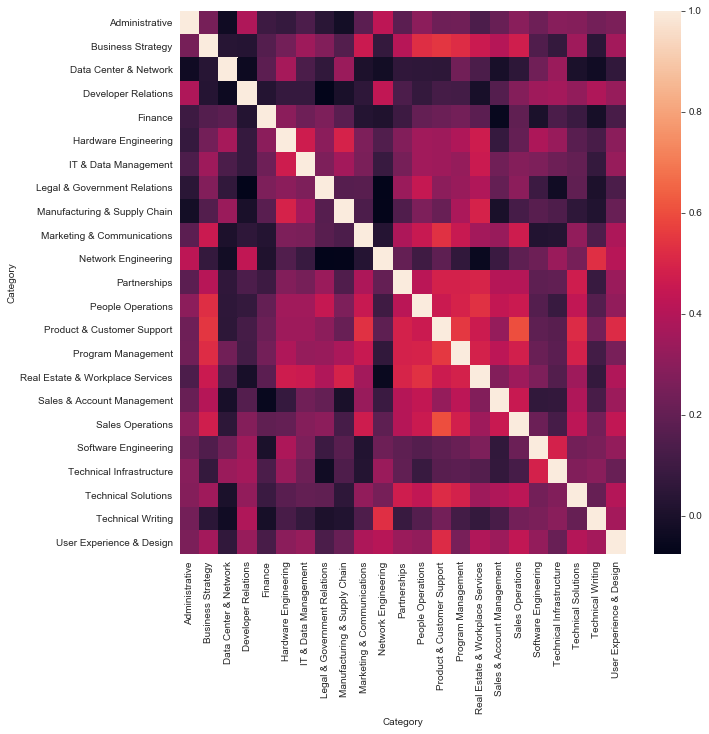

In [105]:
#vou apenas diferenciar 'presença' ou 'ausência' da skill em cada categoria. Não é interessante manter a contagem, já que esta
# é influenciada pelo número de vagas na área.

for categ in category_skills.columns:
    category_skills[categ] = category_skills[categ].apply(lambda x: 1 if x>0 else 0) 

# Agora buscarei ver categorias correlacionadas (tendo como base as colunas recém criadas):
plt.figure(figsize=(10,10))
sns.heatmap(data=category_skills.corr())

# Rudimentos de um Sistema de Recomendação

### Estamos começando a ter sucesso em criar distinções entre as diversas áreas e a encontrar áreas com skills relacionadas.

### Esta mesma base poderia ser usada para um sistema de recomendação.

Uma forma interessante de calcular o grau de correspondência de um candidato com uma área talvez seja calcular a projeção do vetor descritivo do candidato sobre cada vaga (no caso não usarei a vaga, e sim a categoria, para facilitar) através de um produto escalar ($\vec{d1}.\vec{d2}=|d1||d2|cos\theta$). Vou testar isso agora.

A questão é: se eu calcular distâncias de forma euclidiana $d=sqrt((x_2-x_1)^2+(y_2-y_1)^2)$ posso penalizar candidatos que tenham habilidades não exigidas pelas vagas, problema que não aconteceria no produto escalar. Da mesma forma uma mera correlação poderia penalizar um candidato que apresente mais qualificações do que as exigidas pela vaga.

Obs: caso eu tenha a descrição de uma pessoa e queira encontrar uma vaga para ela, o número de skills descritivas deveriam ser similares entre as vagas ou categorias para que uma categoria não pontue mais que outra pelo simples fato de seu vetor descritivo ser maior. Mas o problema que estamos abordando geralmente seria o contrário: diante de uma vaga, quais são os melhores candidatos? Neste caso não precisaríamos de vagas com vetores descritivos de tamanhos similares (a outras vagas).

In [106]:
# tentativa:
# Vou criar um "candidato" Lucas que seria ótimo para Marketing e Technical Solutions:


Lucas = category_skills['Marketing & Communications'] + category_skills['Technical Solutions']
Lucas = Lucas.apply(lambda x: 1 if x>0 else 0)

Lucas = pd.Series(Lucas)

In [107]:
# Vou criar um dicionário para guardar a pontuação para diferentes categorias de vagas. Este cálculo
# será feito através do produto escalar entre o vetor descritivo do candidato e o vetor descritivo da categoria.
# A mesma lógica poderia ser usada para vagas (títulos da vaga). E também podemos usar para o problema inverso:
# diante de um título de vaga, que candidato pontua melhor. Sigamos:

score = {}

# para cada categoria, calculo o produto escalar da categoria e candidato
for category in category_skills.columns:
    vec = pd.Series(category_skills[category]) # para calcular o produto escalar preciso que a categoria esteja em forma de Series do pandas
    score[category] = Lucas.dot(vec)

pd.DataFrame(score,index=score.keys()).iloc[0].sort_values(ascending=False) # finalmente estou apenas rankeando os valores dos scores

Technical Solutions                 55
Marketing & Communications          53
Sales & Account Management          42
Program Management                  34
Product & Customer Support          29
Business Strategy                   28
Sales Operations                    27
People Operations                   26
Finance                             25
User Experience & Design            24
Partnerships                        24
Software Engineering                23
Legal & Government Relations        15
Technical Infrastructure            15
Hardware Engineering                13
Developer Relations                 13
Real Estate & Workplace Services    12
Manufacturing & Supply Chain        11
IT & Data Management                 9
Administrative                       9
Technical Writing                    6
Network Engineering                  5
Data Center & Network                1
Name: Administrative, dtype: int64


#### Evidentemente, devido à construção do vetor descritivo do Lucas (a partir de Marketing e Technical Solutions), as categorias mais indicadas são Technical Solutions, Marketing e seguem...

Agora dando um formato de função: 

In [108]:
def categorias_promissoras(candidato):
    score = {}
    for category in category_skills.columns:
        vec = pd.Series(category_skills[category]) 
        score[category] = candidato.dot(vec)

    return pd.DataFrame(score,index=score.keys()).iloc[0].sort_values(ascending=False)

In [109]:
categorias_promissoras(Lucas)

Technical Solutions                 55
Marketing & Communications          53
Sales & Account Management          42
Program Management                  34
Product & Customer Support          29
Business Strategy                   28
Sales Operations                    27
People Operations                   26
Finance                             25
User Experience & Design            24
Partnerships                        24
Software Engineering                23
Legal & Government Relations        15
Technical Infrastructure            15
Hardware Engineering                13
Developer Relations                 13
Real Estate & Workplace Services    12
Manufacturing & Supply Chain        11
IT & Data Management                 9
Administrative                       9
Technical Writing                    6
Network Engineering                  5
Data Center & Network                1
Name: Administrative, dtype: int64

# Dicas para um amigo que quer trabalhar no Google.

Se um colega meu quisesse encontrar uma vaga no Google, minha primeira reação seria entender o que ele quer, o que está disposto a fazer e quais as experiências e conquistas atuais dele.

- Ele está com pressa e quer entrar onde der ou ele tem tempo de se preparar e sabe em que setor quer atuar? 
- Que o nível de experiência que ele já tem? 

As vagas mais abundantes estão nos **EUA** no **setor de vendas**, e muitas **não mencionam anos de experiência** prévia. Mas meu colega teria interesse em uma vaga assim? Teria interesse em se mudar? 

Quanto às distribuições de vagas, a maioria está nos EUA. Em um segundo lugar, distante, encontramos vagas na Irlanda. E apenas em décimo terceiro lugar, com 15 vagas, encontramos o Brasil.

Caso meu amigo busque um campo com muitas oportunidades, as categorias com vagas mais abundantes são, nesta ordem:
- Sales & Account Management;
- Marketing & Communications;
- Finance.

Teria meu amigo anos de experiência em alguma área? Isso poderia contar pontos! Ou estaria ele disposto a ingressar em uma área nova que não exige anos de experiência anterior? Tais vagas são abundantes na maioria dos setores.

As categorias mais abundantes em vagas que não mencionam experiência anterior são, nesta ordem: 
- Sales & Account Management;
- Technical Solutions;
- Marketing & Communications;
- Finance.

Ainda assim, muito provavelmente ele vai precisar de ao menos um bacharelado como grau mínimo de formação (BA, BS e Bacharelado genericamente).

Se ele tiver que aprender a programar as quatro principais linguagens seriam: **Python, Java, JavaScript e SQL**. Podemos ser mais precisos com relação às skills (inclusive linguagens de programação) que ele precisaria desenvolver de acordo com o título ou categoria da vaga pretendida.

Então, de acordo com suas vontades e qualificações poderíamos analisar os gaps que existem para que ele assuma determinado cargo. Ou podemos ver quais as vagas para as quais ele já estaria apto.


# Outras visualização interessantes

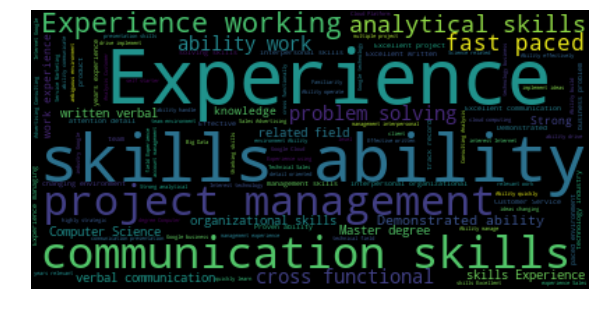

In [110]:
# Para aumentarmos nossa compreensão sobre qualificações desejadas:
cloud_from_column(df['Preferred Qualifications'])

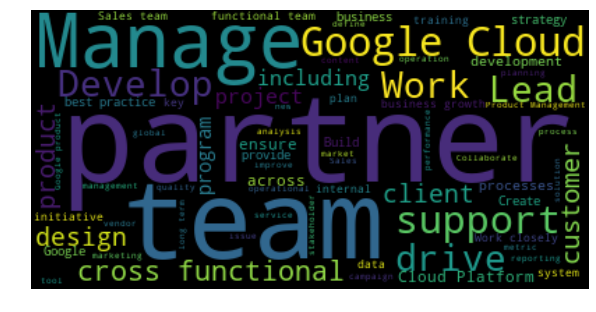

In [111]:
# E quanto às responsabilidades mais comuns às diversas vagas?
cloud_from_column(df['Responsibilities'])

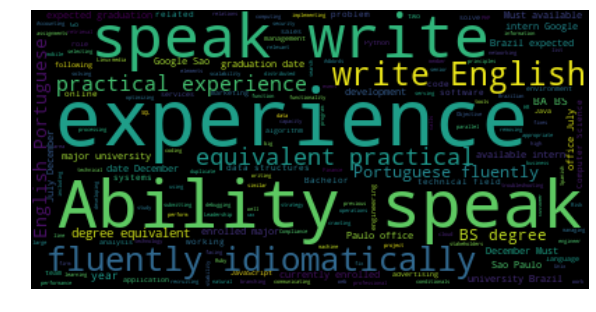

In [112]:
# E quanto às qualificações mínimas relacionadas às vagas no Brasil?
cloud_from_column(df[df['Countries']=='Brazil']['Minimum Qualifications'])

Referências usadas ou armazenadas para melhorias futuras:

Referência para wordcloud: https://www.datacamp.com/community/tutorials/wordcloud-python

Referência para sistemas de recomandação: http://coral.ufsm.br/pet-si/index.php/sistemas-de-recomendacao-desvendando-uma-parte-da-magica/

Sobre clusterização: https://lamfo-unb.github.io/2017/10/05/Introducao_basica_a_clusterizacao/